In [102]:
#My dependencies
import requests
import pandas as pd
from census import Census
from api_keys_JT import census_api_key
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import stats

In [2]:
# Instance of the Census library
c = Census(census_api_key)

# Define the range of years you want to retrieve data for
years = range(2005, 2023)

# Initialize an empty list to store the data for each year
all_data = []

# Loop through each year and make the API call, add the year to each row.

for year in years:

	data = c.acs1.get(
		(
		'NAME',
		'B25077_001E',
		'B25058_001E',
		'B15003_022E',
		'B01003_001E',
		'B23025_004E',
		'B17001_002E',
		'B23025_003E'
		),
		{'for': 'county:*', 'in': 'state:*'},
	)

	for row in data:
		row['Year'] = year
		all_data.append(row)
	
#Making a DataFrame
data_df = pd.DataFrame(all_data)

data_df = data_df.rename(columns={
	'NAME': 'County Name',
	'state': 'State FIPS',
	'county': 'County FIPS',
	'B25077_001E': 'Median House Price ($)',
	'B25058_001E': 'Median Rent ($)',
	'B01003_001E': 'Total Population',
	'B15003_022E': 'Population with Bachelor\'s Degree',
	'B23025_004E':"Number of Employed People",
	'B17001_002E':"People with Income Below Poverty",
	'B23025_003E': "Total Labor Force"
})

# Display the first few rows of the DataFrame
data_df


,County Name,Median House Price ($),Median Rent ($),Population with Bachelor's Degree,Total Population,Number of Employed People,People with Income Below Poverty,Total Labor Force,State FIPS,County FIPS,Year
0,"Baldwin County, Alabama",304600.0,892.0,36327.0,246435.0,112931.0,32313.0,116464.0,01,003,2005
1,"Calhoun County, Alabama",148100.0,505.0,11551.0,115788.0,49681.0,20450.0,53066.0,01,015,2005
2,"Cullman County, Alabama",184800.0,501.0,8236.0,90665.0,40812.0,16019.0,43353.0,01,043,2005
3,"DeKalb County, Alabama",157700.0,437.0,3749.0,71998.0,31392.0,13967.0,32516.0,01,049,2005
4,"Elmore County, Alabama",204700.0,796.0,8481.0,89563.0,42508.0,9133.0,44198.0,01,051,2005
...,...,...,...,...,...,...,...,...,...,...,...
15259,"Ponce Municipio, Puerto Rico",95000.0,418.0,19333.0,132138.0,37696.0,68118.0,42956.0,72,113,2022
15260,"San Juan Municipio, Puerto Rico",164900.0,436.0,68930.0,334776.0,137999.0,126728.0,153027.0,72,127,2022
15261,"Toa Alta Municipio, Puerto Rico",174400.0,437.0,11355.0,66041.0,28504.0,18491.0,31453.0,72,135,2022
15262,"Toa Baja Municipio, Puerto Rico",138800.0,430.0,11652.0,72783.0,32493.0,24484.0,35481.0,72,137,2022


In [ ]:
# # Instance of the Census library
# c = Census(census_api_key)

# # Run Census Search to retrieve data on all counties (ACS5 Census Data)

# # Define the range of years you want to retrieve data for
# years = range(2005, 2023)

# # Initialize an empty list to store the data for each year
# all_data = []

# # Loop through each year and make the API call, add the year to each row.

# for year in years:

# 	data = c.acs5.get(
# 		(
# 		'NAME',
# 		'B25077_001E',
# 		'B25058_001E',
# 		'B15003_022E',
# 		'B01003_001E',
# 		'B23025_004E',
# 		'B17001_002E',
# 		'B23025_003E'
# 		),
# 		{'for': 'county:*', 'in': 'state:*'},
# 	)
	
# 	for row in data:
# 		row['Year'] = year
# 		all_data.append(row)
# 	print(len(all_data))
# #Making a DataFrame
# # data_df = pd.DataFrame(all_data)
# # data_df.head()

# data_df = data_df.rename(columns={
# 	'NAME': 'County Name',
# 	'state': 'State FIPS',
# 	'county': 'County FIPS',
# 	'B25077_001E': 'Median House Price ($)',
# 	'B25058_001E': 'Median Rent ($)',
# 	'B01003_001E': 'Total Population',
# 	'B15003_022E': 'Population with Bachelor\'s Degree',
# 	'B23025_004E':"Number of Employed People",
# 	'B17001_002E':"People with Income Below Poverty",
# 	'B23025_003E': "Total Labor Force"
# })

# # Display the first few rows of the DataFrame
# data_df.head()



3222
6444
9666
12888
16110
19332
22554
25776
28998
32220
35442
38664
41886
45108
48330
51552
54774
57996


,County Name,Median House Price ($),Median Rent ($),Population with Bachelor's Degree,Total Population,Number of Employed People,People with Income Below Poverty,Total Labor Force,State FIPS,County FIPS,Year
0,"Baldwin County, Alabama",304600.0,892.0,36327.0,246435.0,112931.0,32313.0,116464.0,01,003,2010
1,"Calhoun County, Alabama",148100.0,505.0,11551.0,115788.0,49681.0,20450.0,53066.0,01,015,2010
2,"Cullman County, Alabama",184800.0,501.0,8236.0,90665.0,40812.0,16019.0,43353.0,01,043,2010
3,"DeKalb County, Alabama",157700.0,437.0,3749.0,71998.0,31392.0,13967.0,32516.0,01,049,2010
4,"Elmore County, Alabama",204700.0,796.0,8481.0,89563.0,42508.0,9133.0,44198.0,01,051,2010


In [ ]:
#check for missing values and check data types
print('Number of Null Values in Each Column:')
print(data_df.isnull().sum())
print('---------------------------------------------------')
# print(data_df.dtypes)

#There's 144 null values within Pop with Bachelors. We should remove these in the next step.

#Print Min and Max values to see how the data looks like and identify any negative values that need to be reviewed and/or removed.

print('Minimum Values:')
print(data_df.min())
print('---------------------------------------------------')
print('Maximum Values:')
print(data_df.max())


Number of Null Values in Each Column:
County Name                            0
Median House Price ($)                 0
Median Rent ($)                        0
Population with Bachelor's Degree    144
Total Population                       0
Number of Employed People              0
People with Income Below Poverty       0
Total Labor Force                      0
State FIPS                             0
County FIPS                            0
Year                                   0
dtype: int64
---------------------------------------------------
Minimum Values:
County Name                          Ada County, Idaho
Median House Price ($)                         66900.0
Median Rent ($)                                  375.0
Population with Bachelor's Degree               2911.0
Total Population                               64246.0
Number of Employed People                      19976.0
People with Income Below Poverty                1819.0
Total Labor Force                            

In [4]:
#Find and remove any potential negative home/rent prices and remove NaN values.

clean_data_df = data_df[
    (data_df['Median House Price ($)'] > 0) &
    (data_df['Median Rent ($)'] > 0) &
    (data_df['Population with Bachelor\'s Degree'].notna())
]

print(clean_data_df.isnull().sum())

County Name                          0
Median House Price ($)               0
Median Rent ($)                      0
Population with Bachelor's Degree    0
Total Population                     0
Number of Employed People            0
People with Income Below Poverty     0
Total Labor Force                    0
State FIPS                           0
County FIPS                          0
Year                                 0
dtype: int64


In [5]:
#Series math to find variables(% of people in poverty, for example, rent-to-price) and add to the DF

clean_data_df['% Pop. Bachelors Degree'] = clean_data_df['Population with Bachelor\'s Degree'] / clean_data_df['Total Population'] * 100
clean_data_df['Annual Rent-to-Price Ratio'] = ((clean_data_df['Median Rent ($)']*12) / clean_data_df ['Median House Price ($)']) * 100
clean_data_df['Employment Rate %'] = (clean_data_df['Number of Employed People'] / clean_data_df['Total Labor Force']) * 100
clean_data_df['% People Living in Poverty'] = (clean_data_df['People with Income Below Poverty'] / clean_data_df['Total Population']) * 100

clean_data_df

C:\Users\jitra\AppData\Local\Temp\ipykernel_16152\1803424263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_df['% Pop. Bachelors Degree'] = clean_data_df['Population with Bachelor\'s Degree'] / clean_data_df['Total Population'] * 100
C:\Users\jitra\AppData\Local\Temp\ipykernel_16152\1803424263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_df['Annual Rent-to-Price Ratio'] = ((clean_data_df['Median Rent ($)']*12) / clean_data_df ['Median House Price ($)']) * 100
C:\Users\jitra

,County Name,Median House Price ($),Median Rent ($),Population with Bachelor's Degree,Total Population,Number of Employed People,People with Income Below Poverty,Total Labor Force,State FIPS,County FIPS,Year,% Pop. Bachelors Degree,Annual Rent-to-Price Ratio,Employment Rate %,% People Living in Poverty
0,"Baldwin County, Alabama",304600.0,892.0,36327.0,246435.0,112931.0,32313.0,116464.0,01,003,2005,14.741007,3.514117,96.966445,13.112180
1,"Calhoun County, Alabama",148100.0,505.0,11551.0,115788.0,49681.0,20450.0,53066.0,01,015,2005,9.975991,4.091830,93.621151,17.661588
2,"Cullman County, Alabama",184800.0,501.0,8236.0,90665.0,40812.0,16019.0,43353.0,01,043,2005,9.083991,3.253247,94.138814,17.668339
3,"DeKalb County, Alabama",157700.0,437.0,3749.0,71998.0,31392.0,13967.0,32516.0,01,049,2005,5.207089,3.325301,96.543240,19.399150
4,"Elmore County, Alabama",204700.0,796.0,8481.0,89563.0,42508.0,9133.0,44198.0,01,051,2005,9.469312,4.666341,96.176298,10.197291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15258,"Mayagüez Municipio, Puerto Rico",100200.0,380.0,8698.0,70609.0,20753.0,35272.0,26493.0,72,097,2022,12.318543,4.550898,78.333900,49.953972
15259,"Ponce Municipio, Puerto Rico",95000.0,418.0,19333.0,132138.0,37696.0,68118.0,42956.0,72,113,2022,14.630916,5.280000,87.754912,51.550652
15260,"San Juan Municipio, Puerto Rico",164900.0,436.0,68930.0,334776.0,137999.0,126728.0,153027.0,72,127,2022,20.589887,3.172832,90.179511,37.854565
15261,"Toa Alta Municipio, Puerto Rico",174400.0,437.0,11355.0,66041.0,28504.0,18491.0,31453.0,72,135,2022,17.193864,3.006881,90.624106,27.999273


In [76]:
#GROUPING ALL DATA BY COUNTIES
#To ensure exact matches, we need to group by all State FIPS, County FIPS, and County Name.
#This is because countys in different states may have the same name.
clean_data_df['Combined FIPS'] = clean_data_df['County FIPS'] + clean_data_df['State FIPS']

grouped_df = clean_data_df.groupby(['County Name', 'Combined FIPS'])
grouped_df.head()



C:\Users\jitra\AppData\Local\Temp\ipykernel_16152\362565594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_df['Combined FIPS'] = clean_data_df['County FIPS'] + clean_data_df['State FIPS']


,County Name,Median House Price ($),Median Rent ($),Population with Bachelor's Degree,Total Population,Number of Employed People,People with Income Below Poverty,Total Labor Force,State FIPS,County FIPS,Year,% Pop. Bachelors Degree,Annual Rent-to-Price Ratio,Employment Rate %,% People Living in Poverty,Combined FIPS
0,"Baldwin County, Alabama",304600.0,892.0,36327.0,246435.0,112931.0,32313.0,116464.0,01,003,2005,14.741007,3.514117,96.966445,13.112180,00301
1,"Calhoun County, Alabama",148100.0,505.0,11551.0,115788.0,49681.0,20450.0,53066.0,01,015,2005,9.975991,4.091830,93.621151,17.661588,01501
2,"Cullman County, Alabama",184800.0,501.0,8236.0,90665.0,40812.0,16019.0,43353.0,01,043,2005,9.083991,3.253247,94.138814,17.668339,04301
3,"DeKalb County, Alabama",157700.0,437.0,3749.0,71998.0,31392.0,13967.0,32516.0,01,049,2005,5.207089,3.325301,96.543240,19.399150,04901
4,"Elmore County, Alabama",204700.0,796.0,8481.0,89563.0,42508.0,9133.0,44198.0,01,051,2005,9.469312,4.666341,96.176298,10.197291,05101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,"Mayagüez Municipio, Puerto Rico",100200.0,380.0,8698.0,70609.0,20753.0,35272.0,26493.0,72,097,2009,12.318543,4.550898,78.333900,49.953972,09772
4235,"Ponce Municipio, Puerto Rico",95000.0,418.0,19333.0,132138.0,37696.0,68118.0,42956.0,72,113,2009,14.630916,5.280000,87.754912,51.550652,11372
4236,"San Juan Municipio, Puerto Rico",164900.0,436.0,68930.0,334776.0,137999.0,126728.0,153027.0,72,127,2009,20.589887,3.172832,90.179511,37.854565,12772
4237,"Toa Alta Municipio, Puerto Rico",174400.0,437.0,11355.0,66041.0,28504.0,18491.0,31453.0,72,135,2009,17.193864,3.006881,90.624106,27.999273,13572


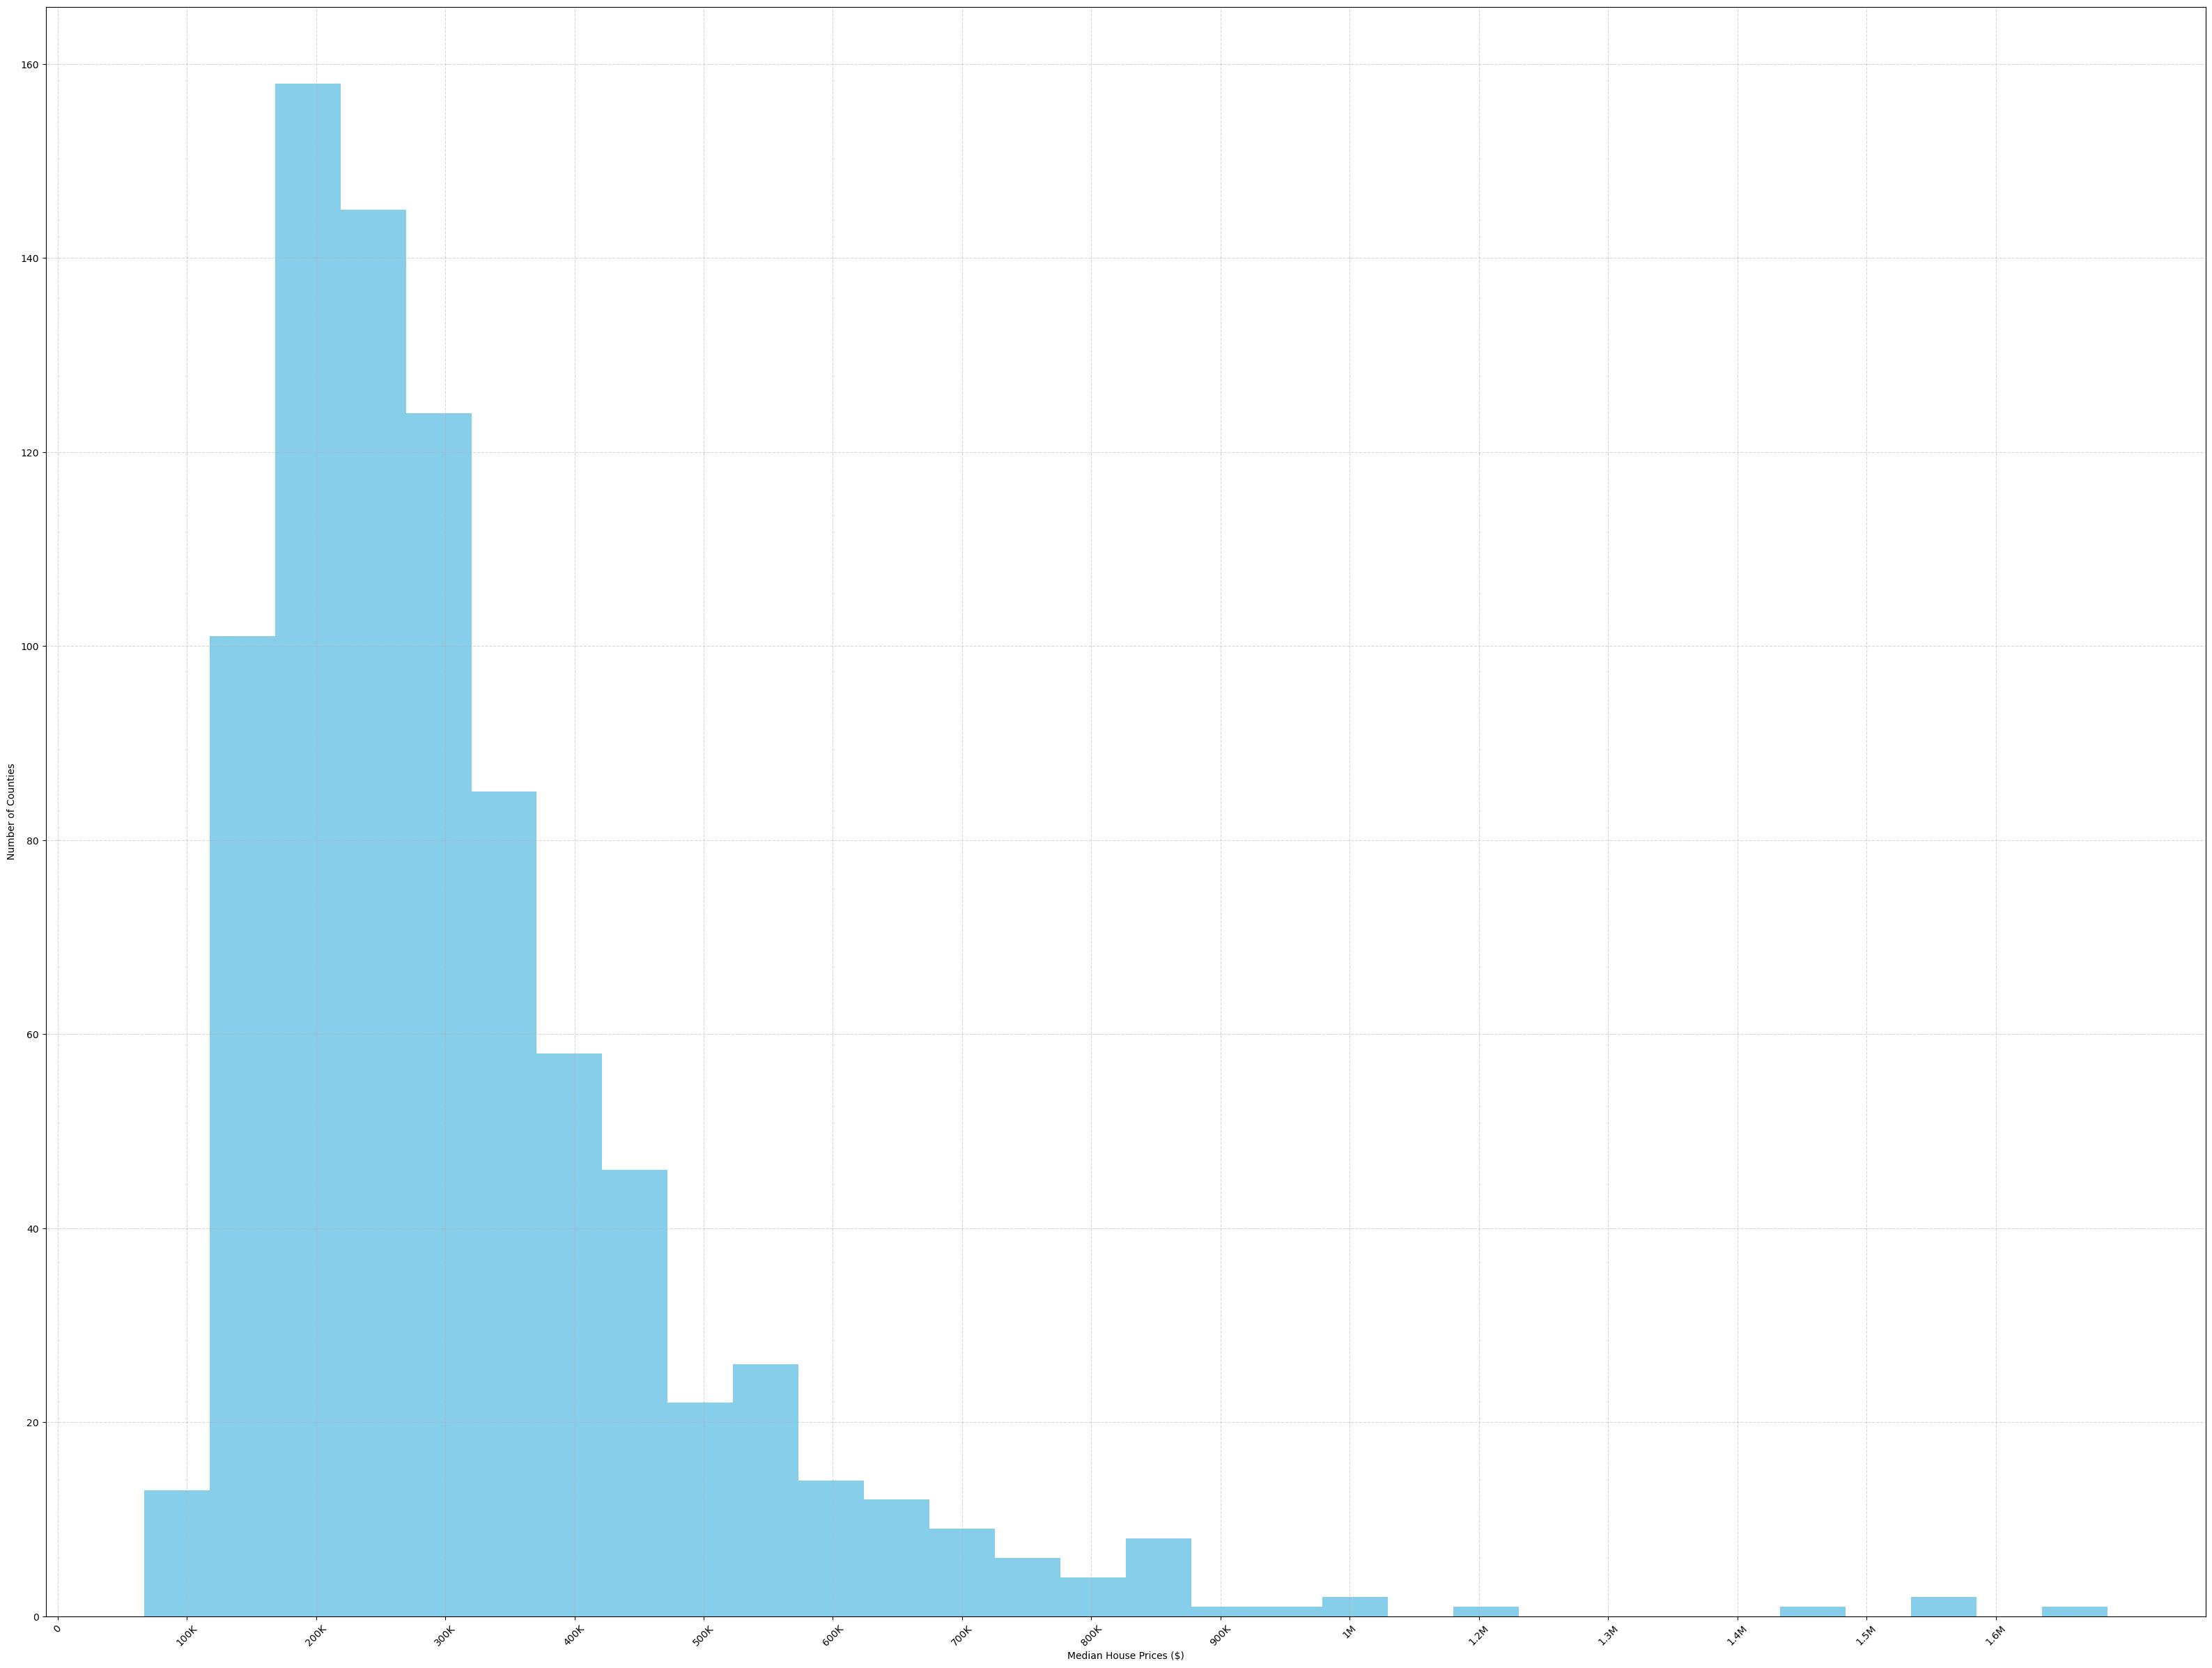

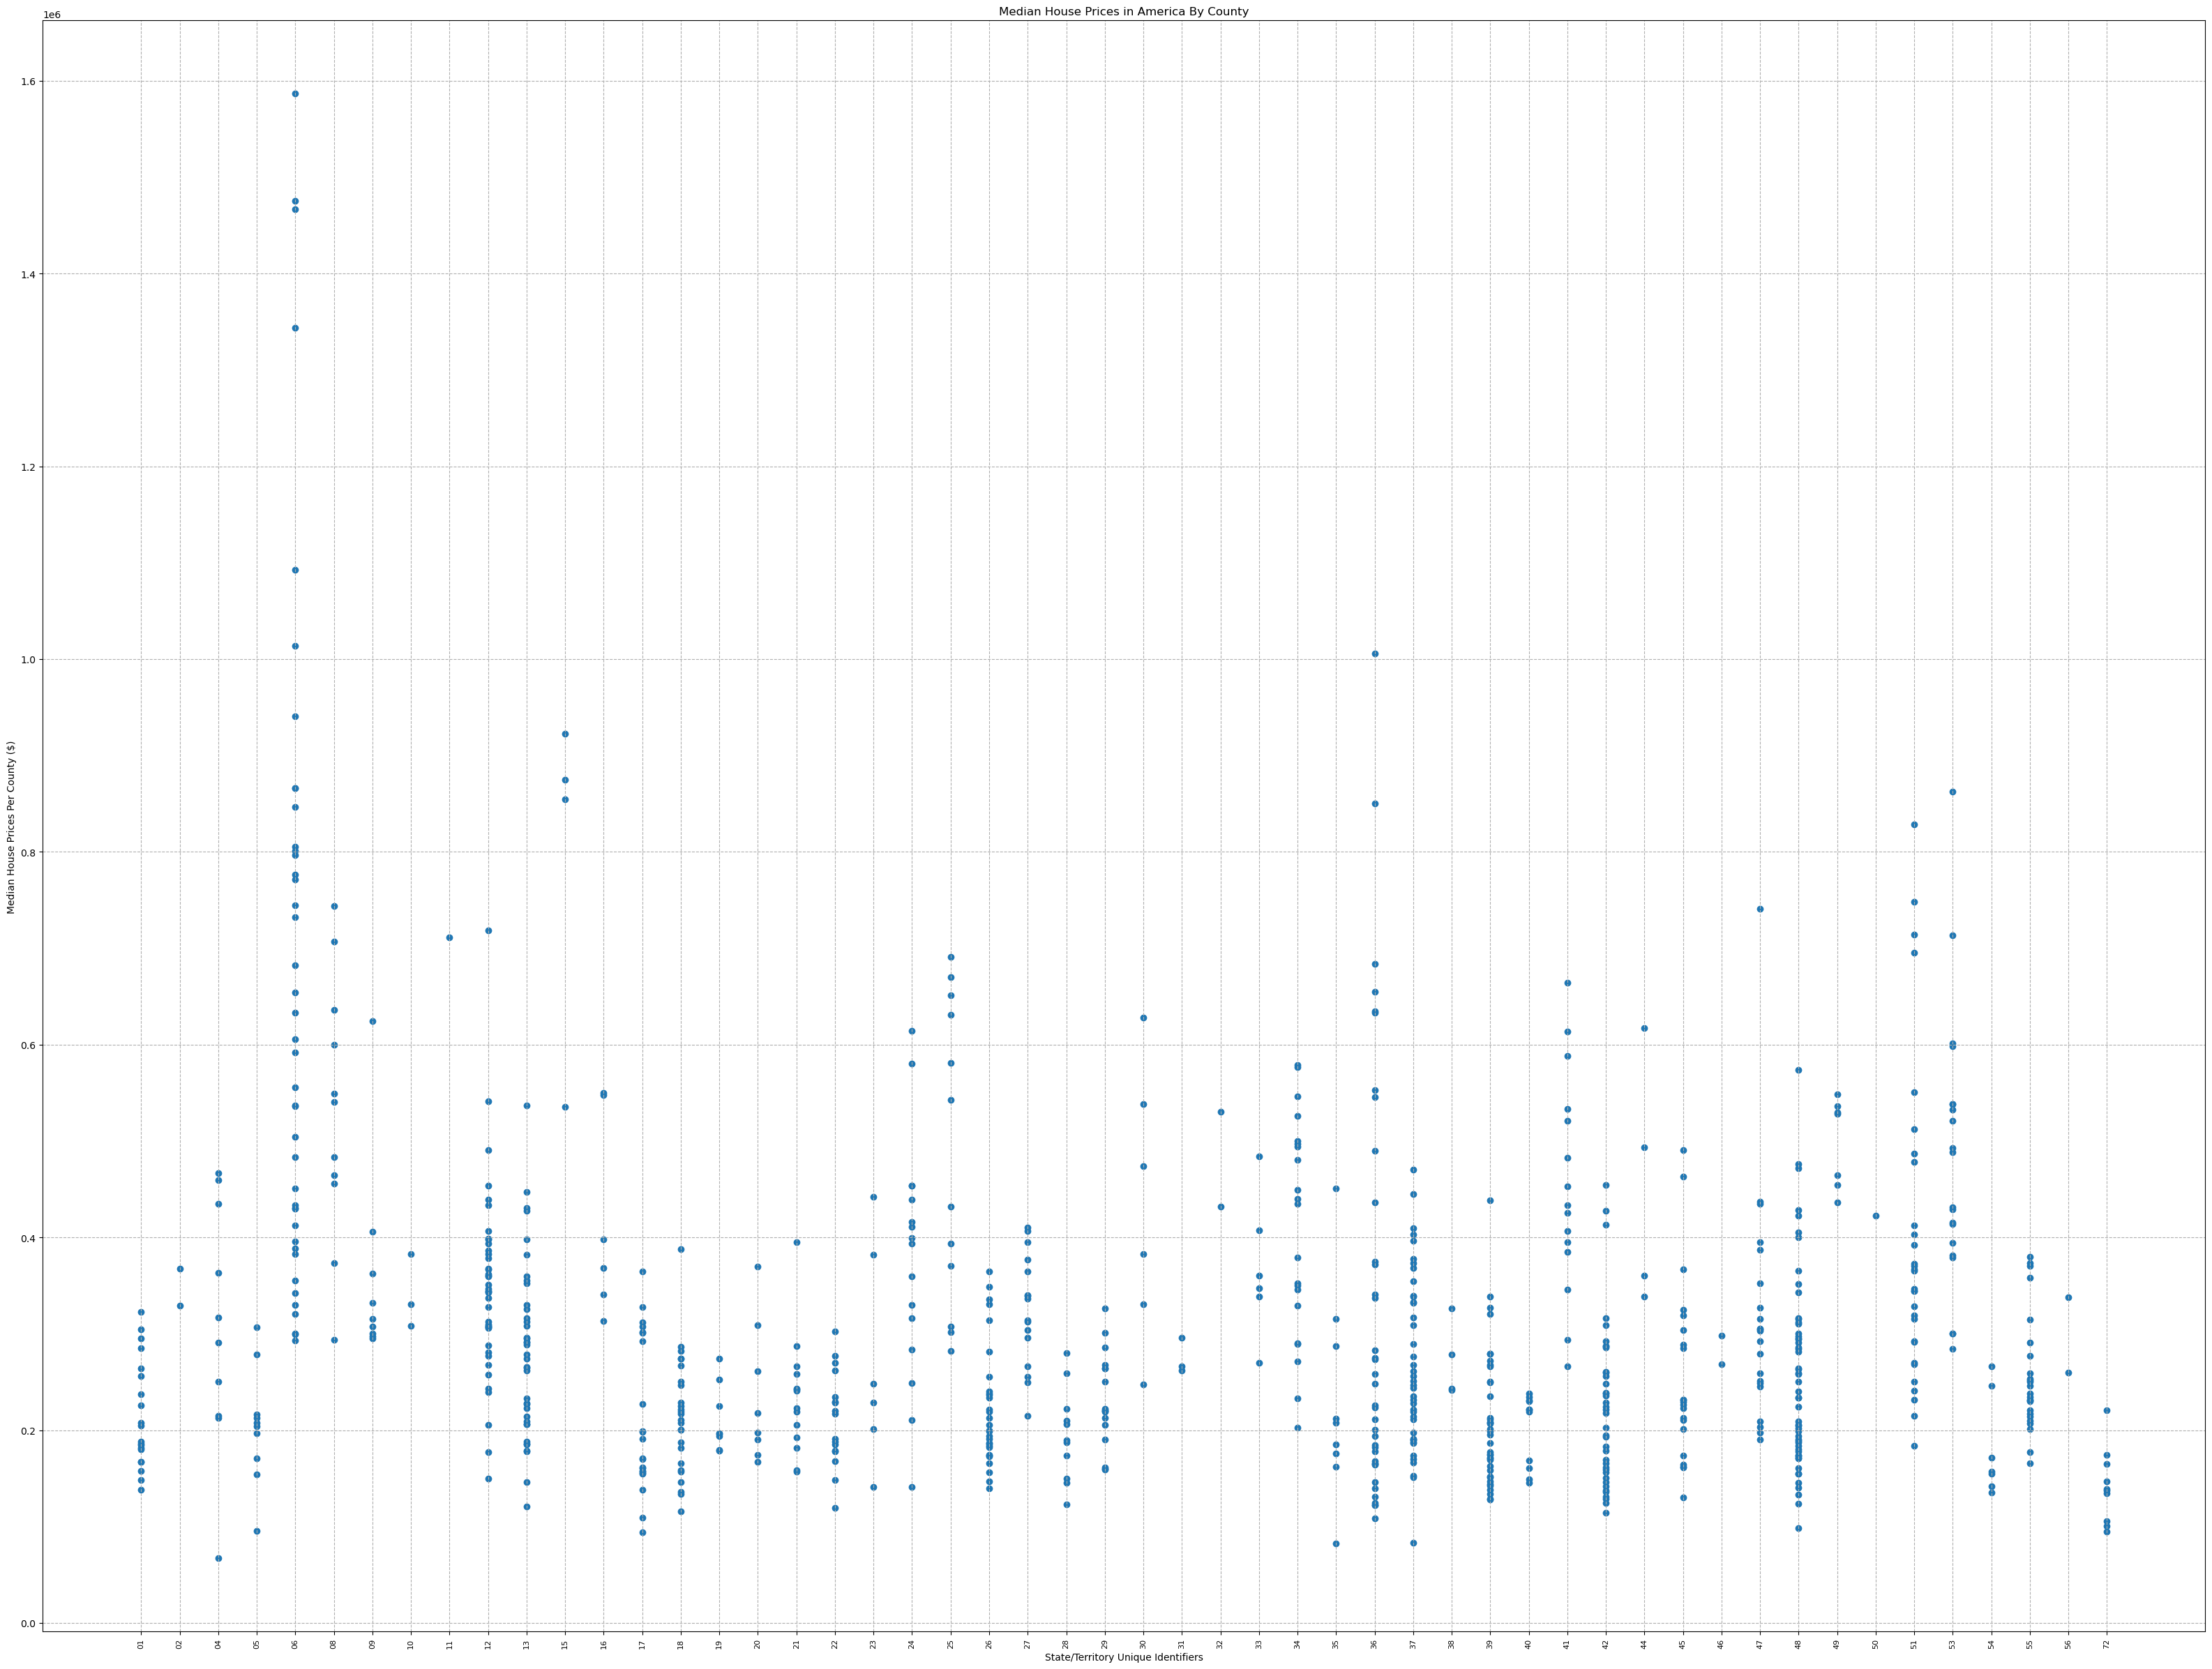

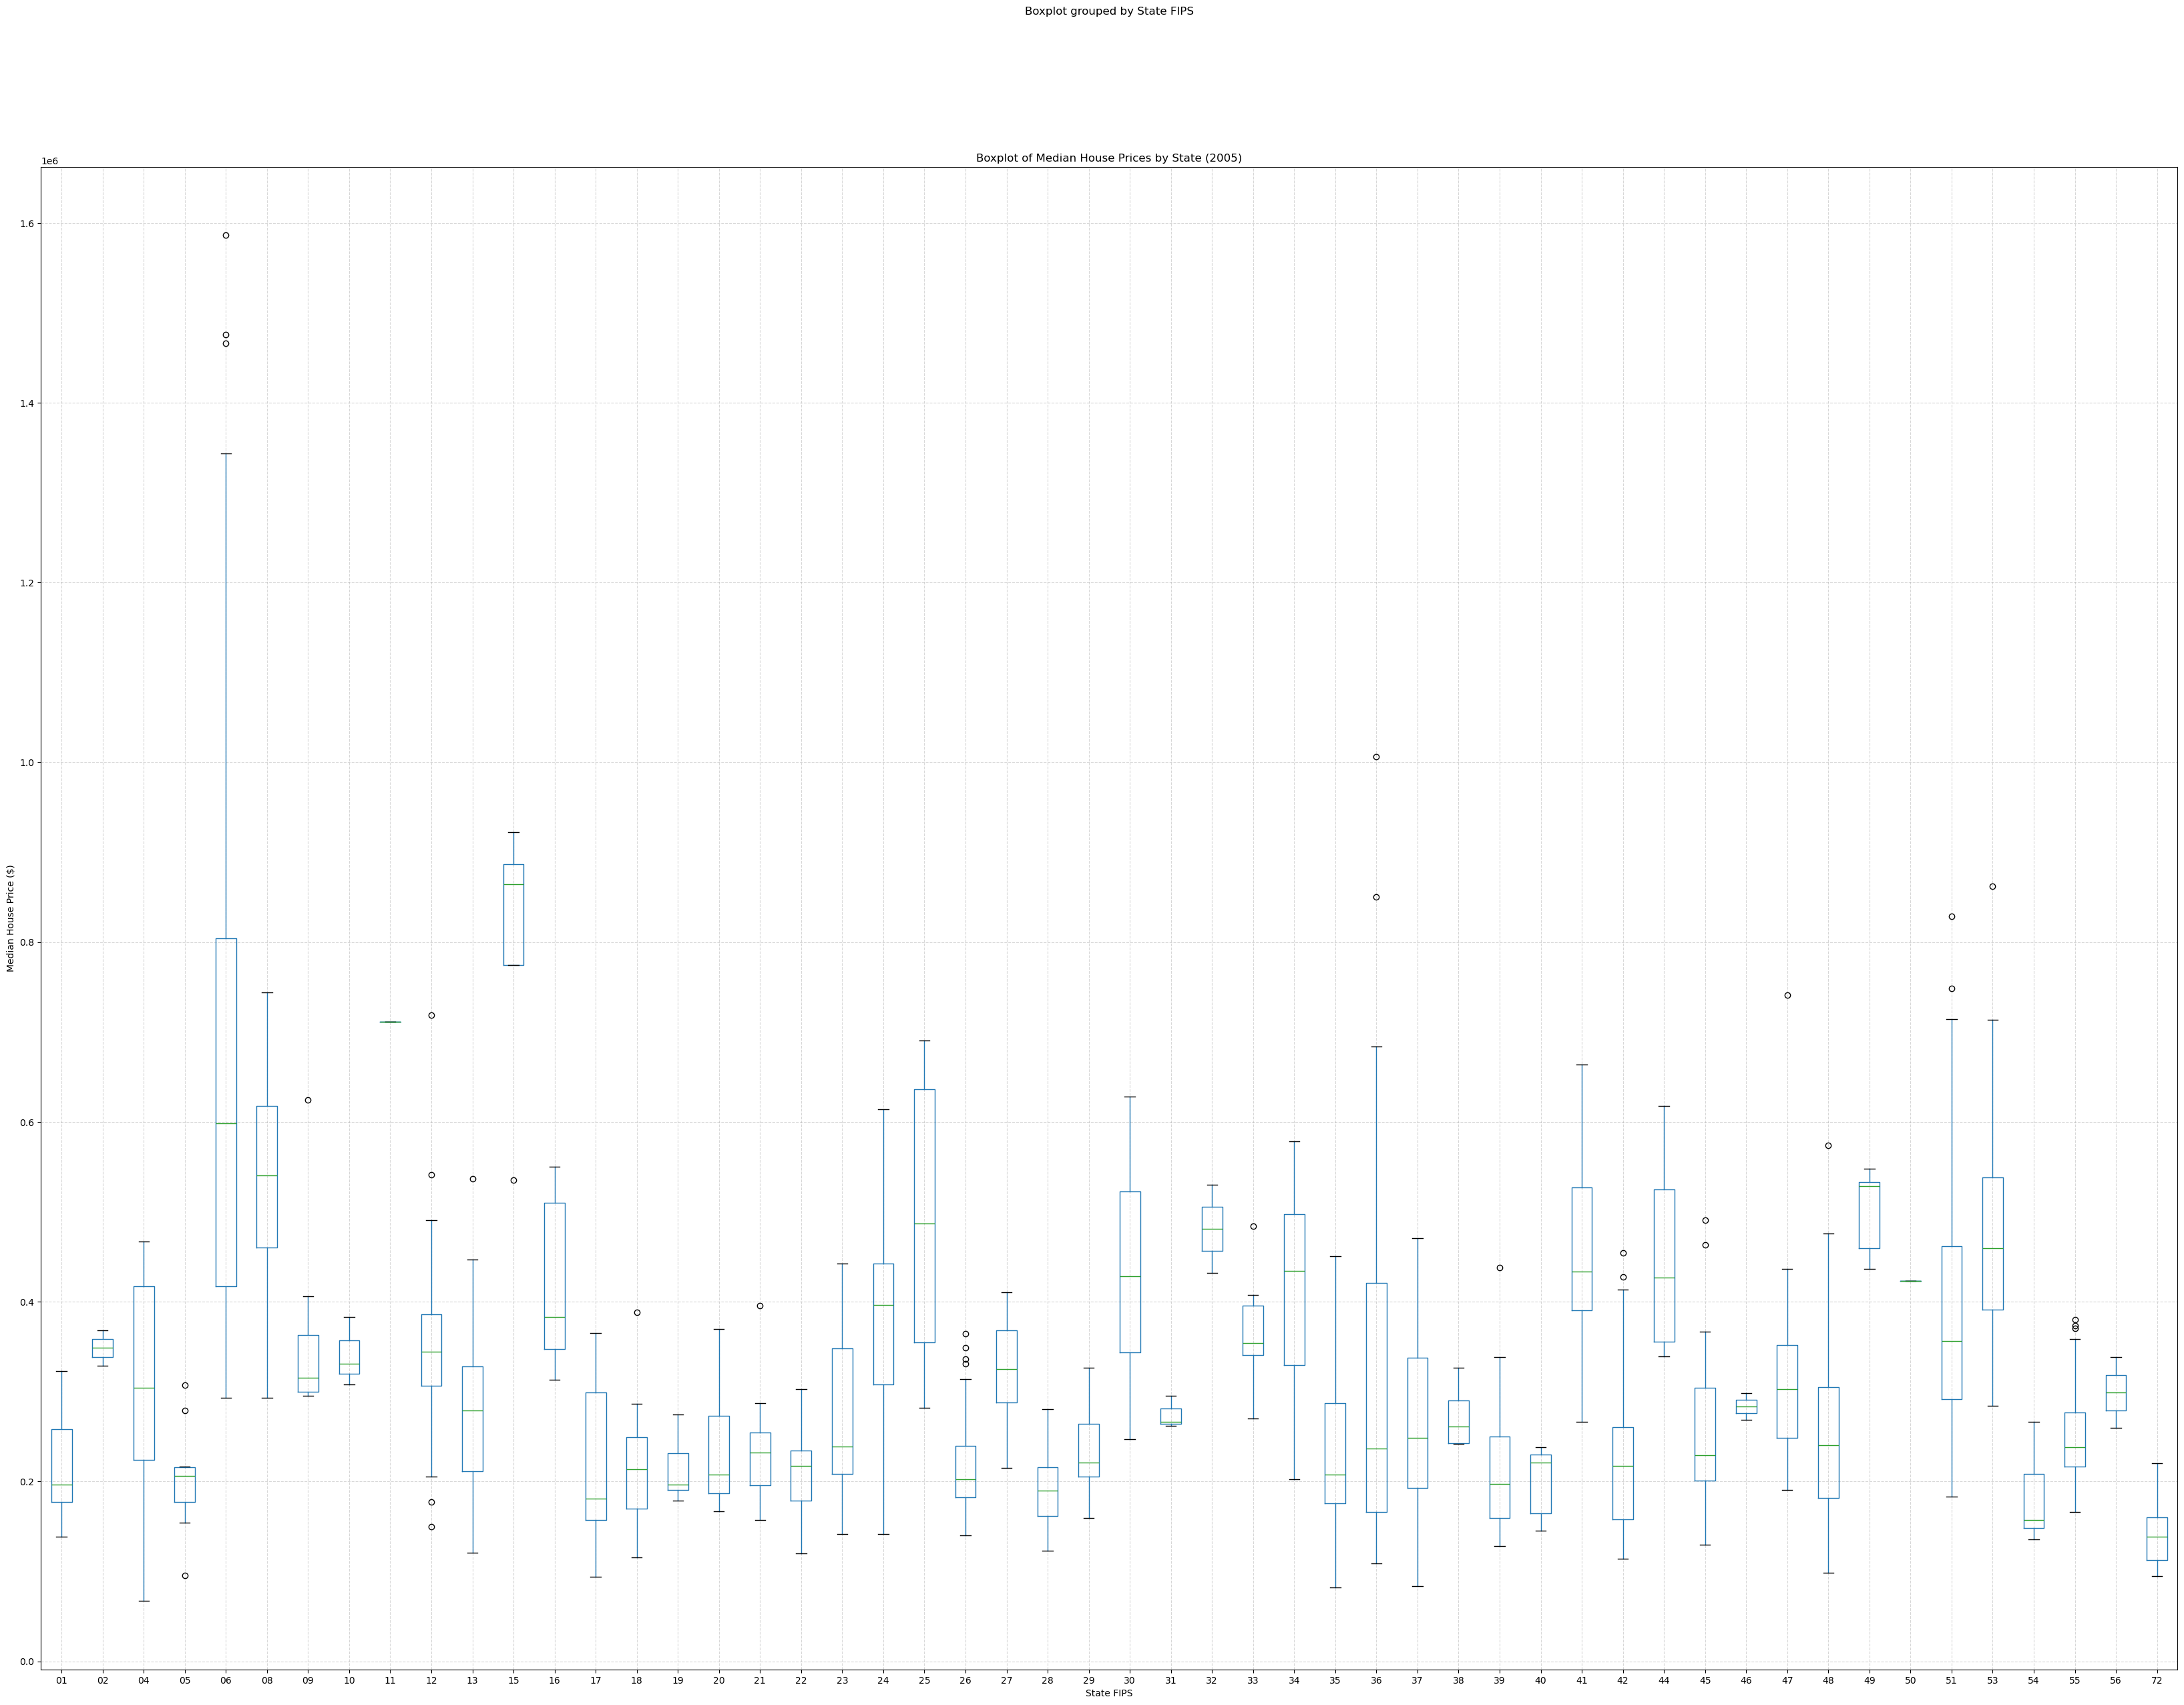

In [77]:
# Taking a look at house prices
#House Prices: Are the median prices increasing, decreasing, or remaining stable over time?
#Has the variability in house prices increased, indicating greater disparity?
#Are there any specific regions where house prices significantly outpace income growth?
#What is the impact of employment shocks on house prices?

plt.figure(figsize=(40,30))
first_year_data = clean_data_df.loc[data_df['Year'] == 2005]
x_values = np.arange(len(first_year_data))
plt.hist(first_year_data["Median House Price ($)"], bins=30, color='skyblue')
plt.xticks(ticks=range(0, 1600000, 100000), labels=['0', '100K', '200K', '300K', '400K', '500K', '600K', '700K', '800K', '900K', '1M','1.2M', '1.3M', '1.4M', '1.5M', '1.6M'], rotation=45)
plt.xlabel('Median House Prices ($)')
plt.ylabel('Number of Counties')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


first_year_data = first_year_data.sort_values(by='State FIPS')
plt.figure(figsize=(40,30))
plt.scatter(first_year_data['State FIPS'], first_year_data['Median House Price ($)'])
plt.title('Median House Prices in America By County')
plt.ylabel('Median House Prices Per County ($)')
plt.xlabel('State/Territory Unique Identifiers')
plt.xticks(rotation=90, fontsize=8)
plt.grid(True, linestyle='--', alpha=1)
plt.show()


fig, ax = plt.subplots(figsize=(40, 30))  
first_year_data.boxplot(column='Median House Price ($)', by='State FIPS', grid=False, ax=ax)
ax.set_title('Boxplot of Median House Prices by State (2005)')
ax.set_xlabel('State FIPS')
ax.set_ylabel('Median House Price ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()




Plotting for mid-year - 2013

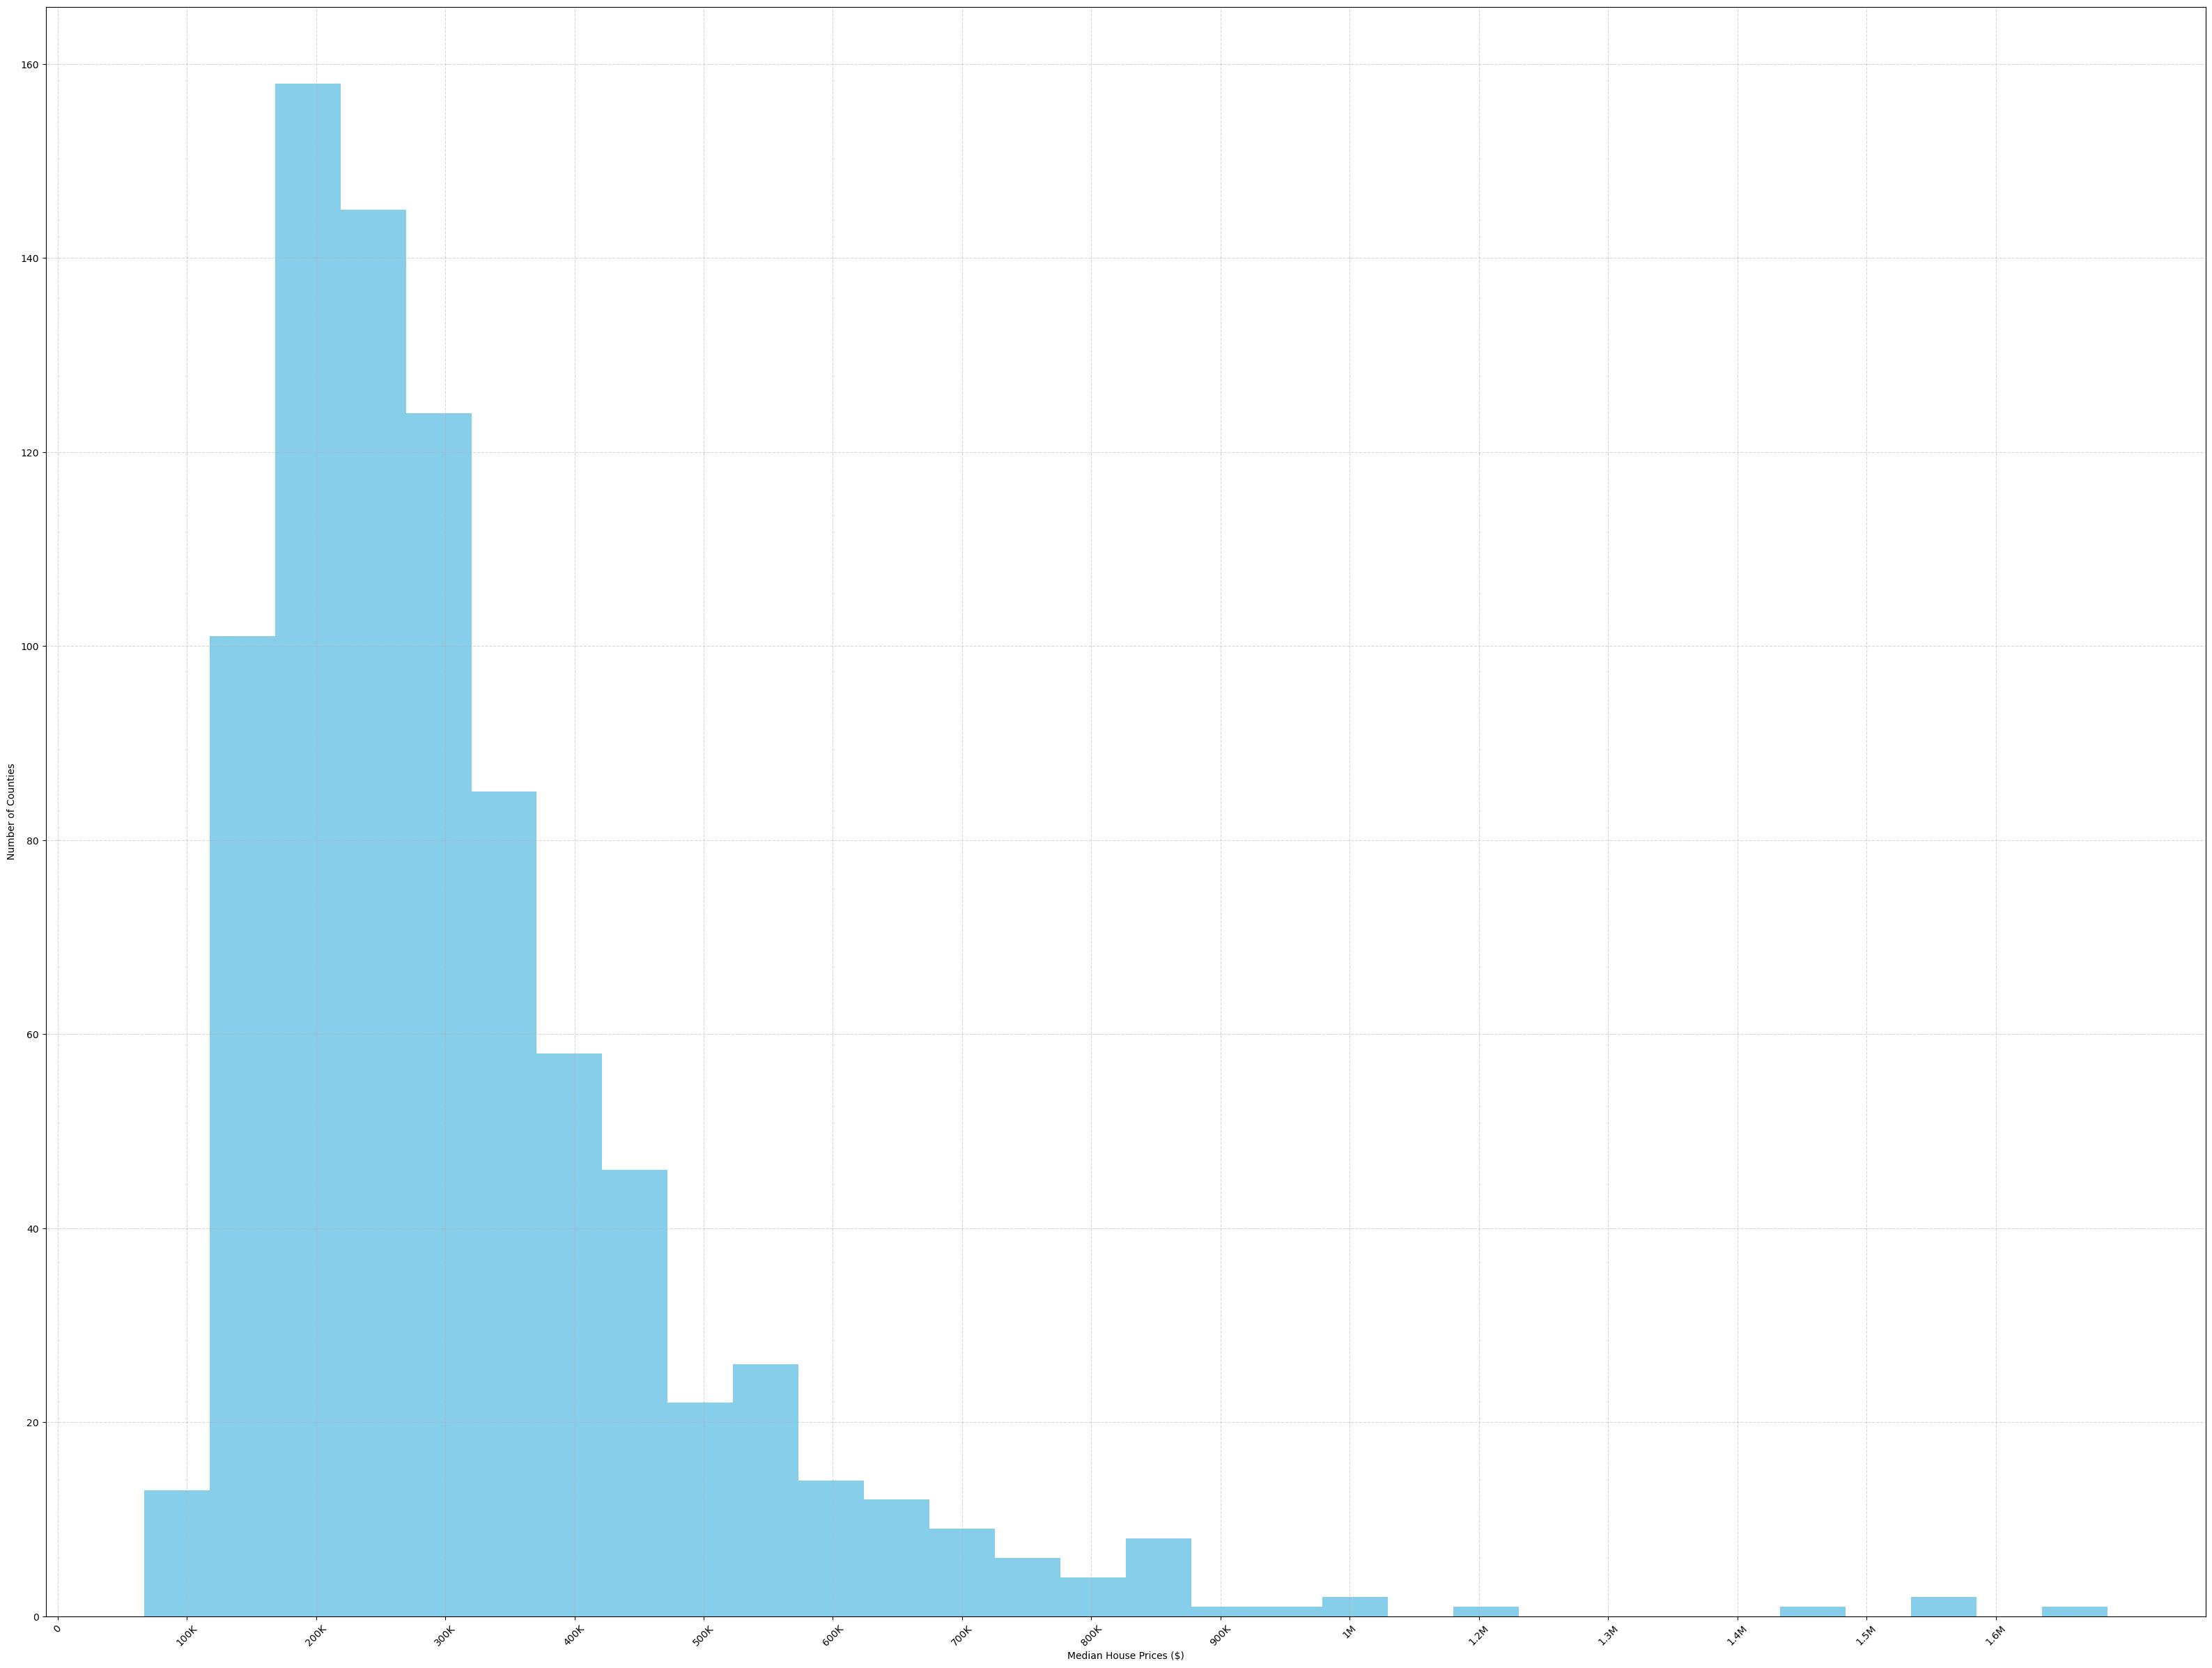

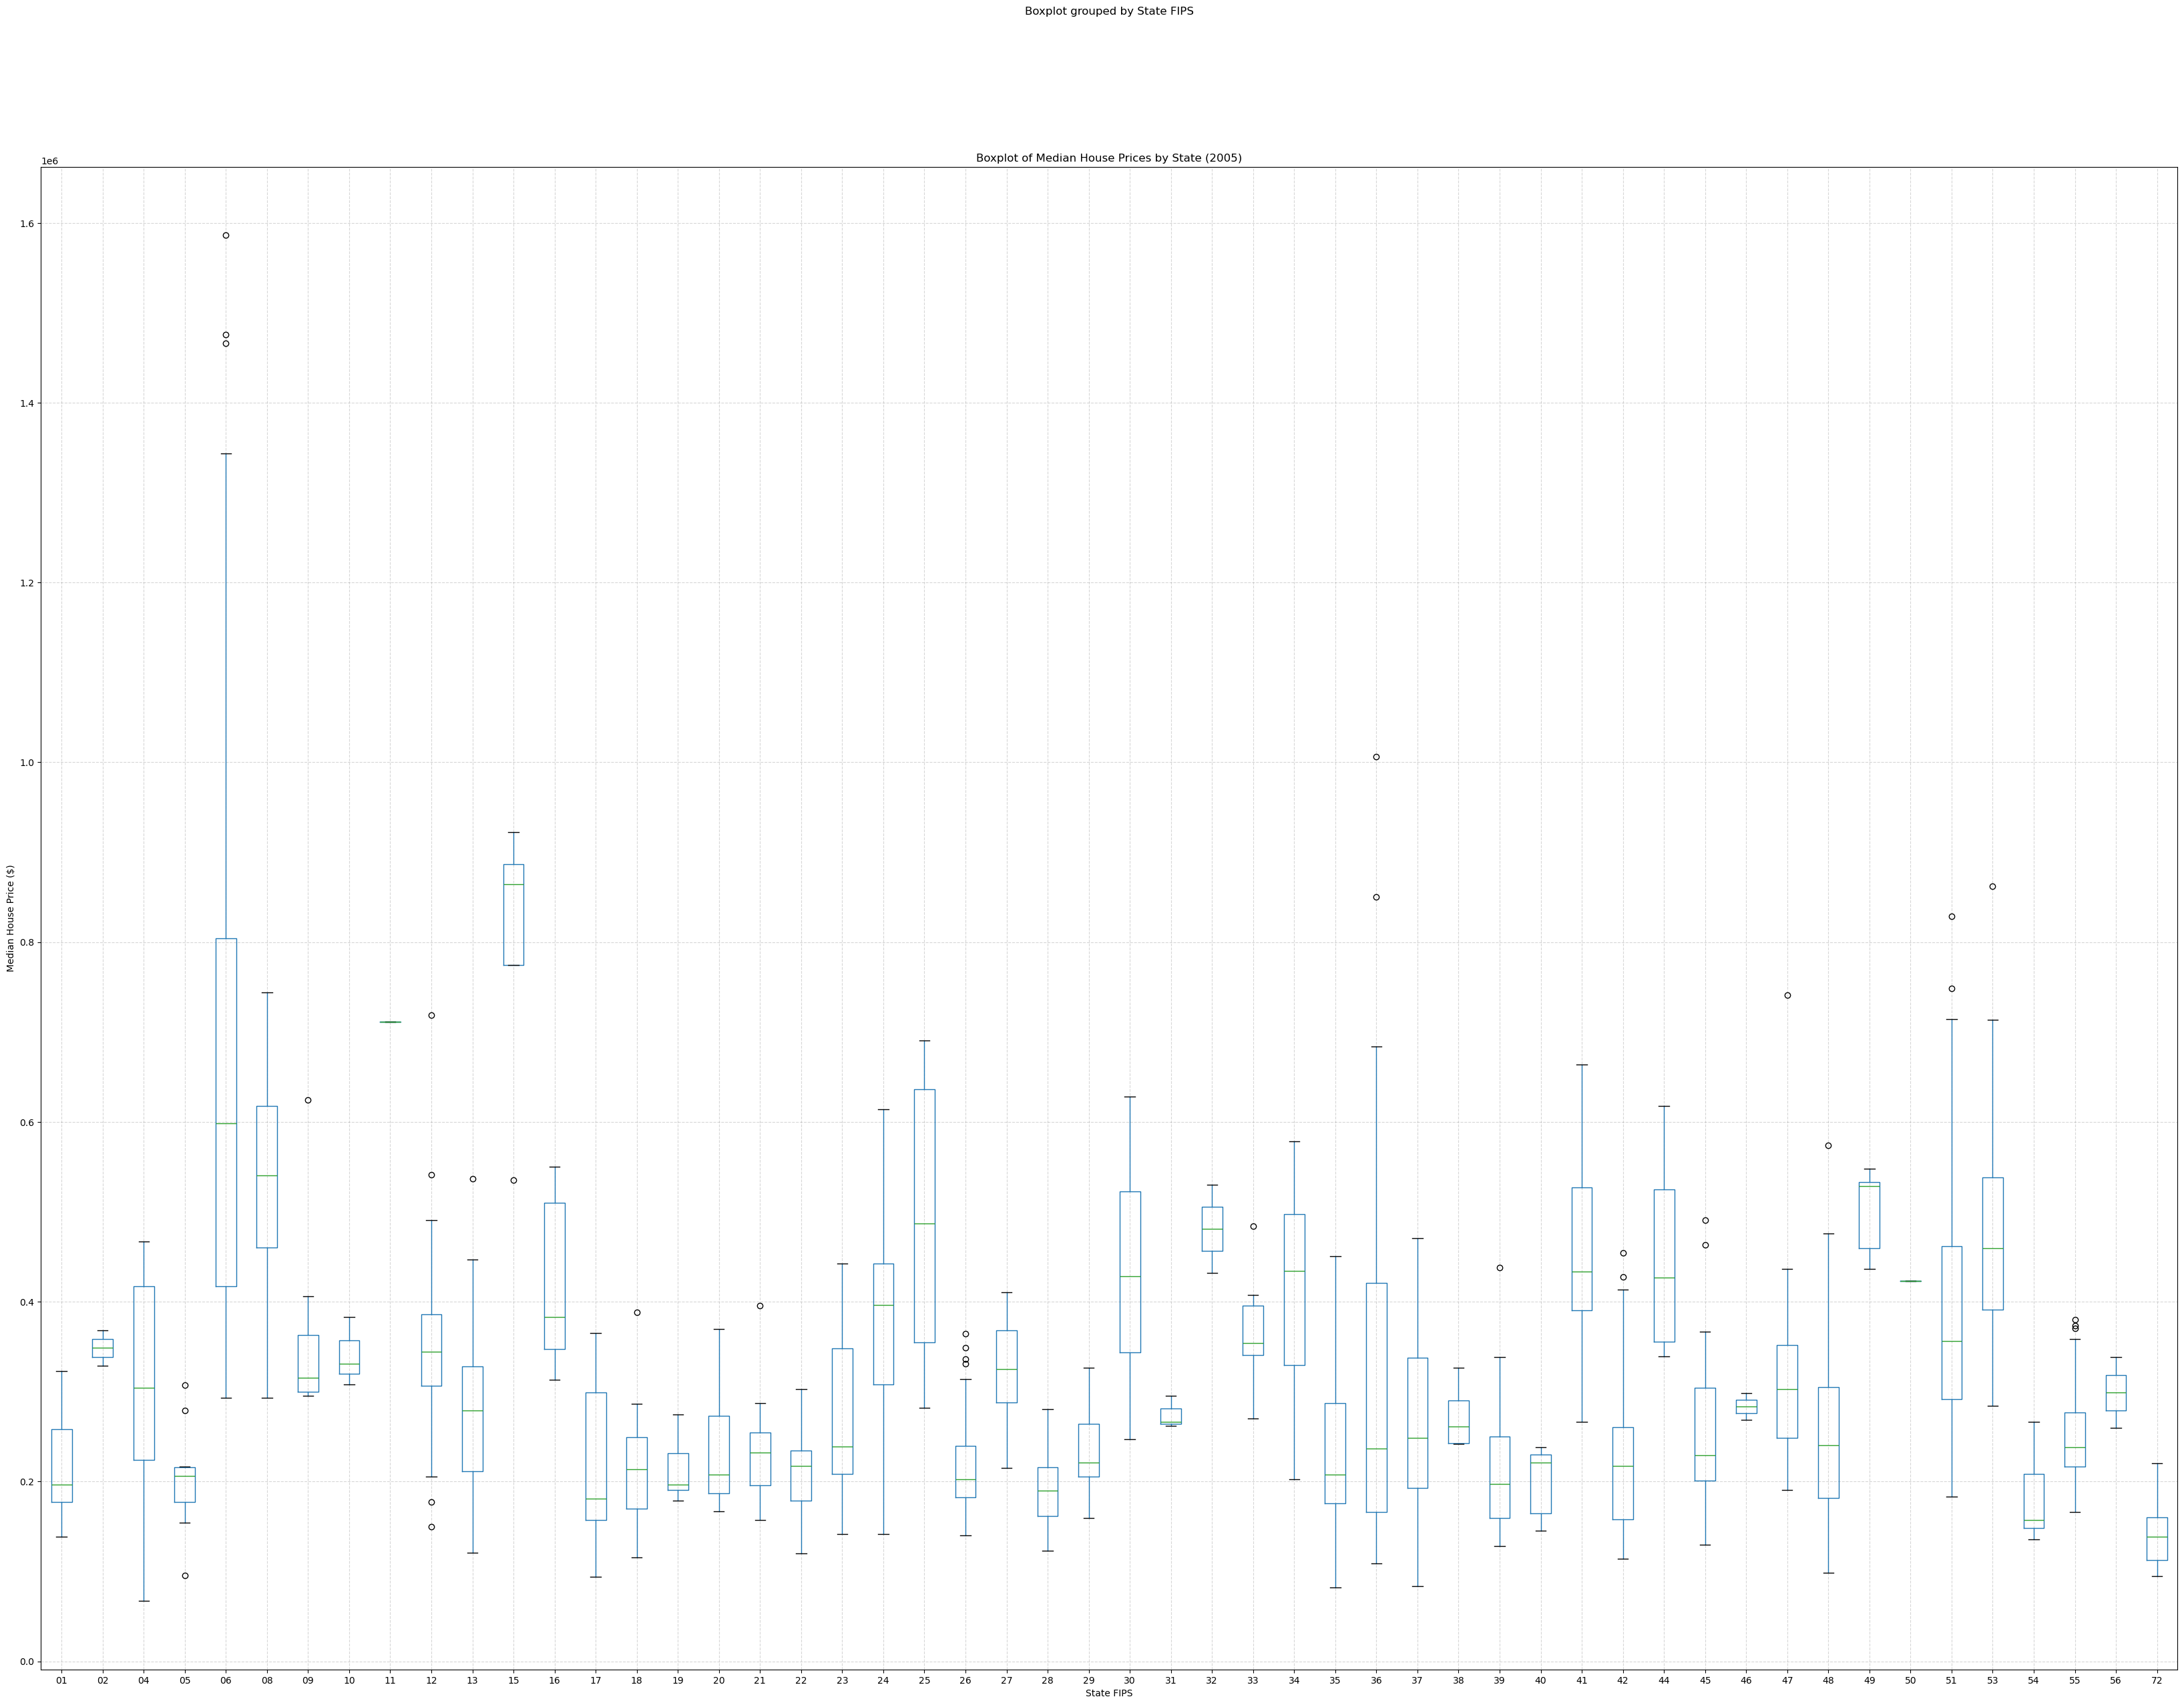

In [78]:
plt.figure(figsize=(40,30))
mid_year_data = clean_data_df.loc[data_df['Year'] == 2013]
x_values = np.arange(len(mid_year_data))
plt.hist(mid_year_data["Median House Price ($)"], bins=30, color='skyblue')
plt.xticks(ticks=range(0, 1600000, 100000), labels=['0', '100K', '200K', '300K', '400K', '500K', '600K', '700K', '800K', '900K', '1M','1.2M', '1.3M', '1.4M', '1.5M', '1.6M'], rotation=45)
plt.xlabel('Median House Prices ($)')
plt.ylabel('Number of Counties')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

fig, ax = plt.subplots(figsize=(40, 30))  
mid_year_data.boxplot(column='Median House Price ($)', by='State FIPS', grid=False, ax=ax)
ax.set_title('Boxplot of Median House Prices by State (2005)')
ax.set_xlabel('State FIPS')
ax.set_ylabel('Median House Price ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Final Year plots - 2022


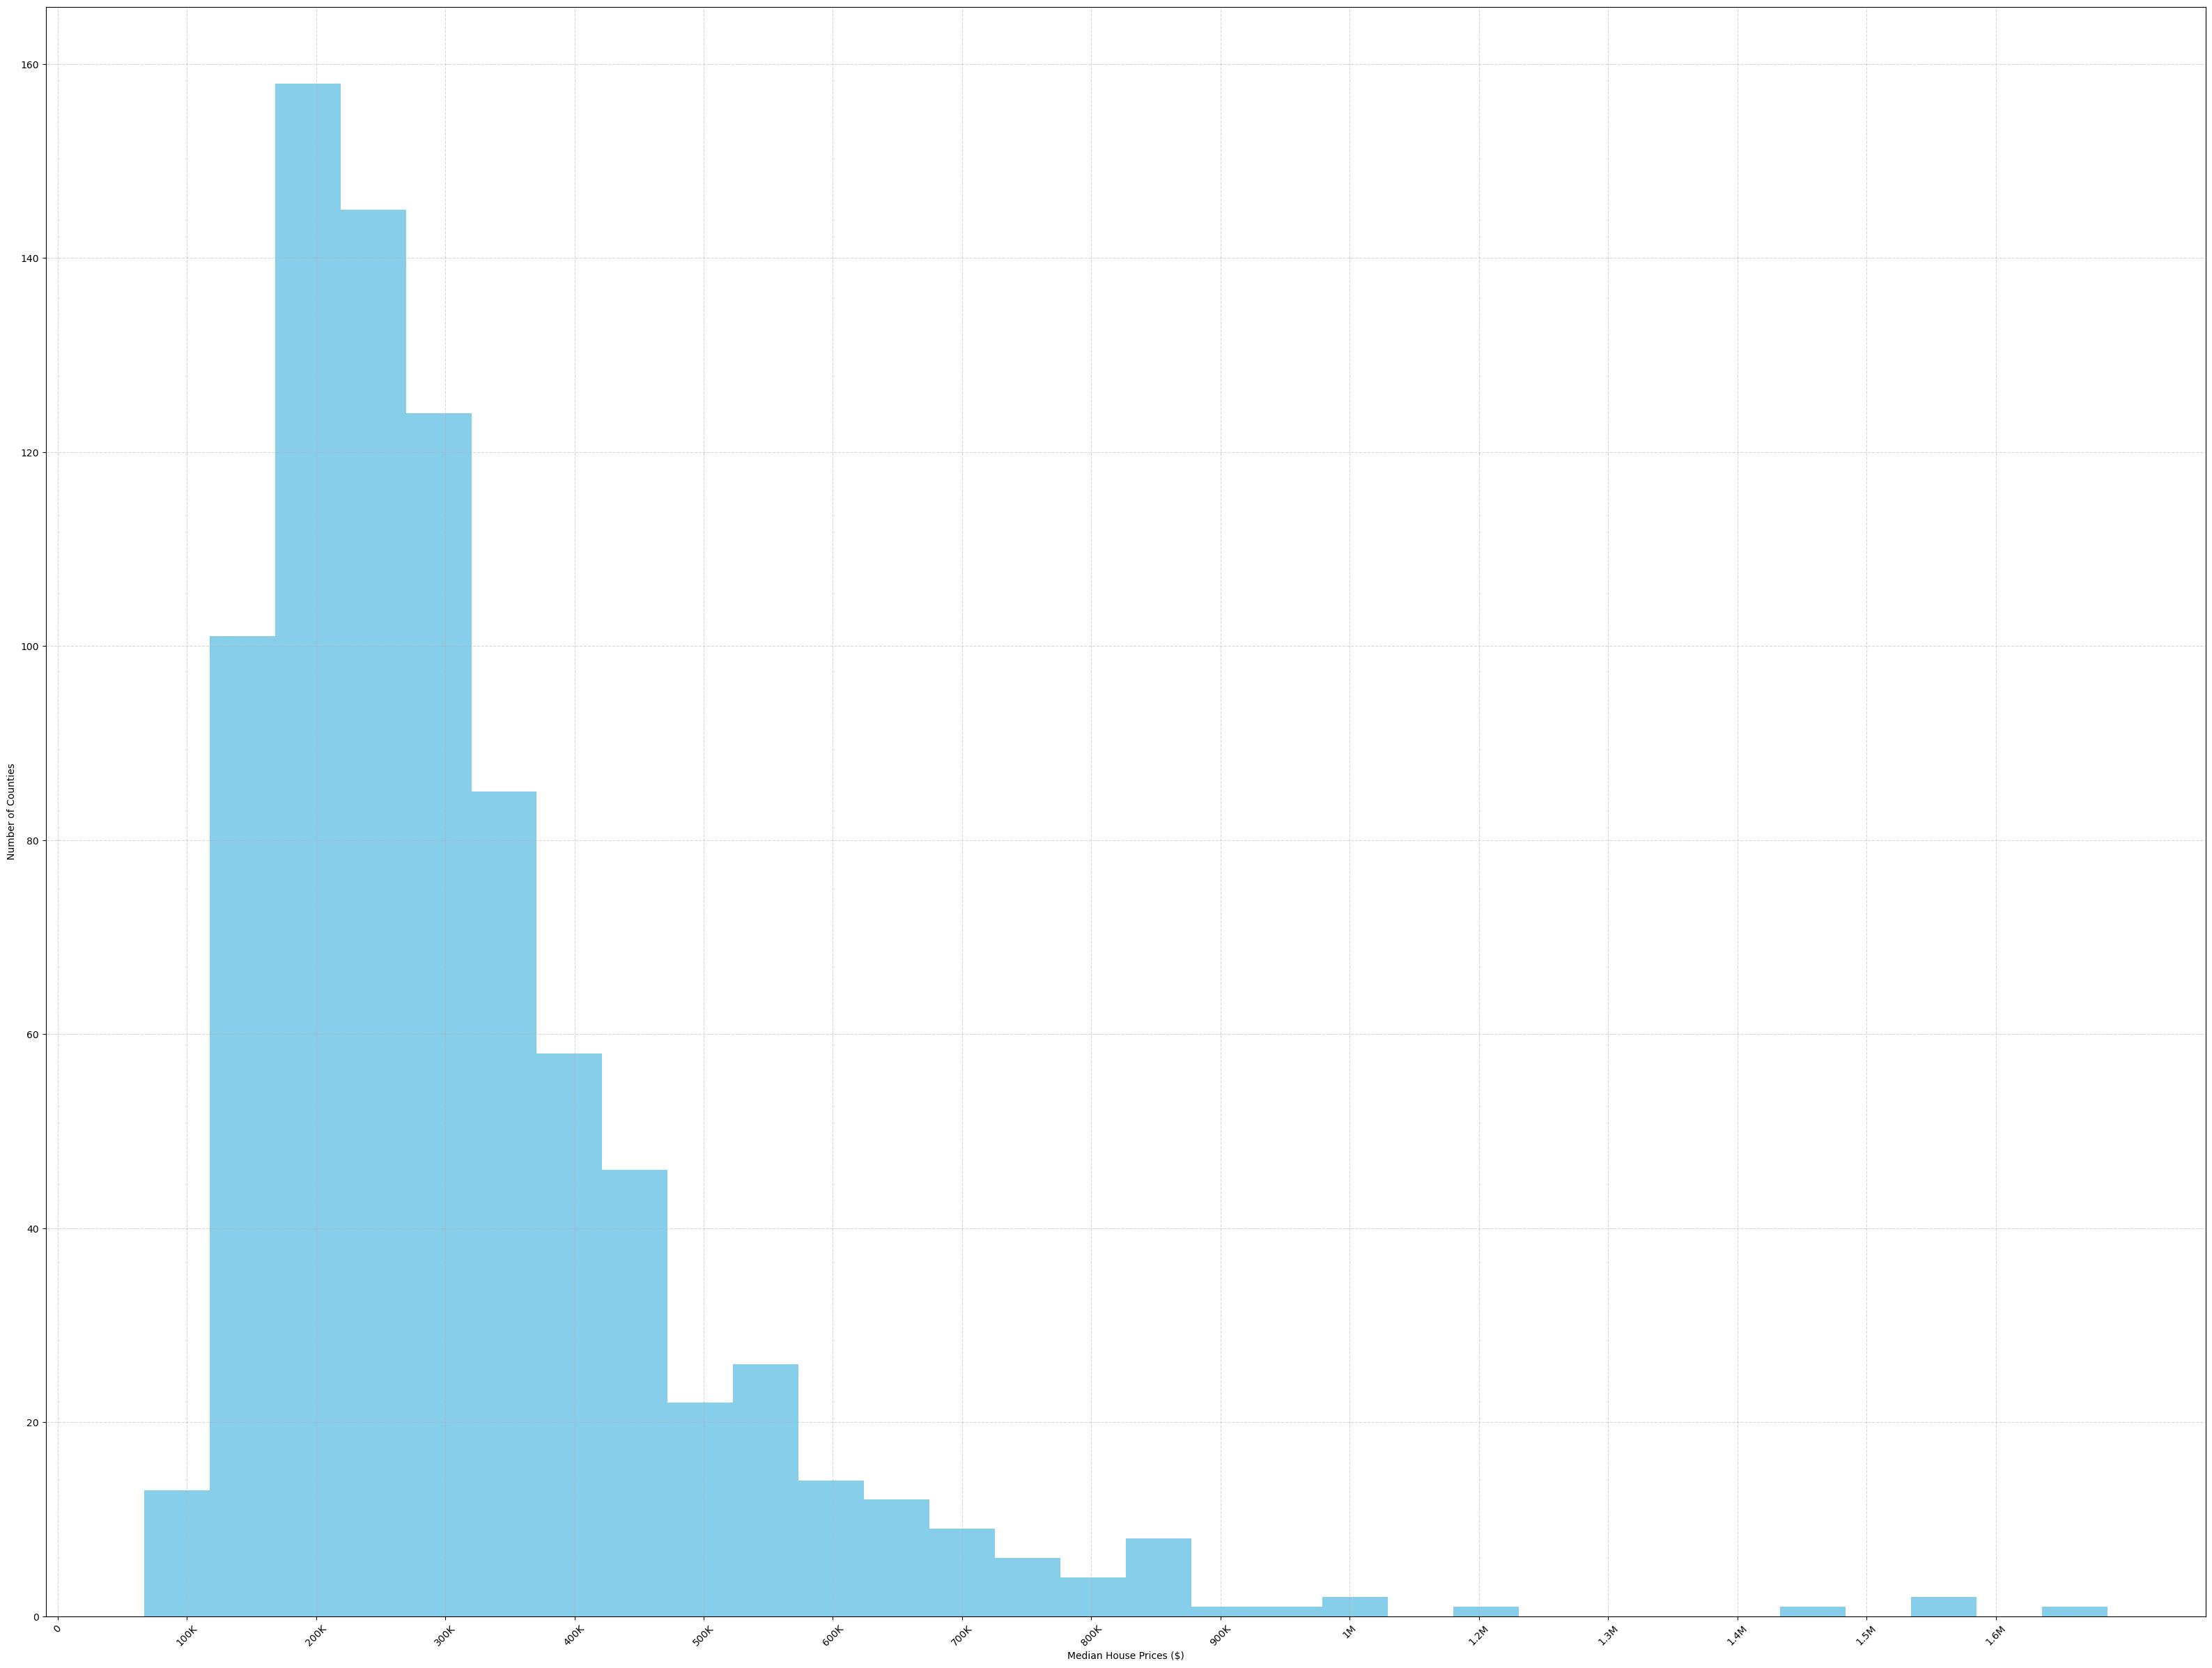

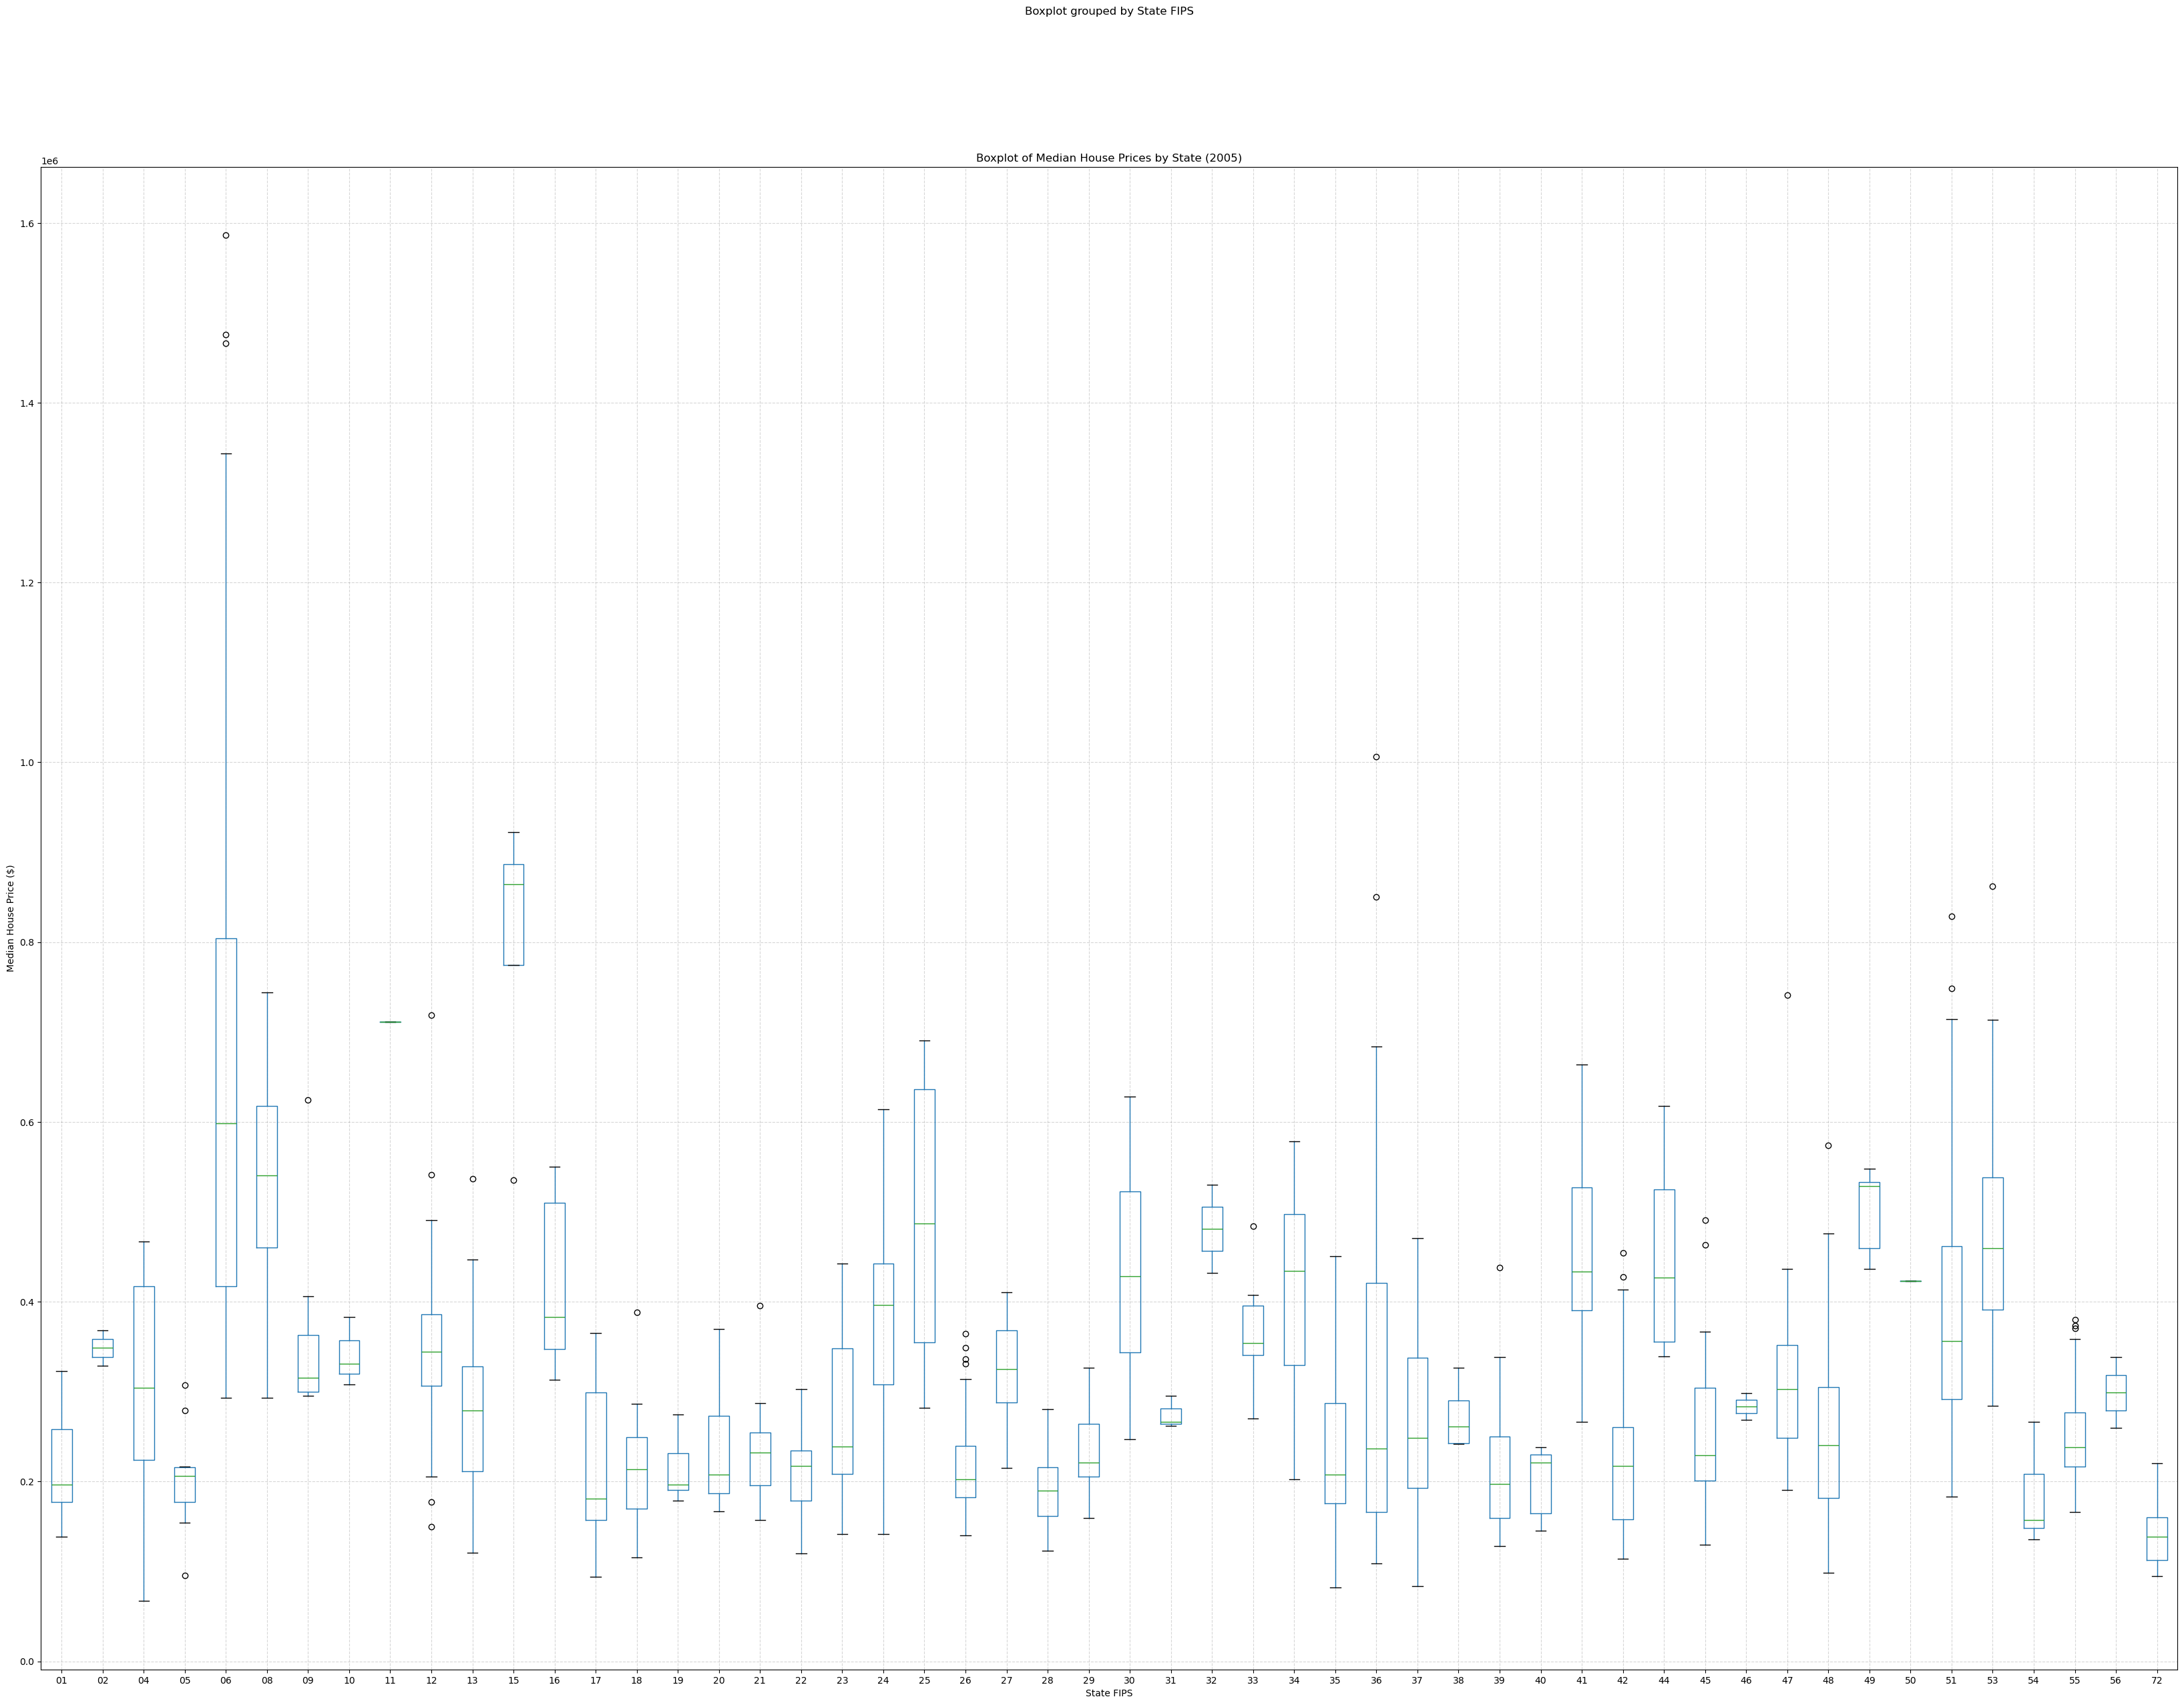

314089.1666666667


In [79]:
plt.figure(figsize=(40,30))
last_year_data = clean_data_df.loc[data_df['Year'] == 2013]
x_values = np.arange(len(last_year_data))
plt.hist(last_year_data["Median House Price ($)"], bins=30, color='skyblue')
plt.xticks(ticks=range(0, 1600000, 100000), labels=['0', '100K', '200K', '300K', '400K', '500K', '600K', '700K', '800K', '900K', '1M','1.2M', '1.3M', '1.4M', '1.5M', '1.6M'], rotation=45)
plt.xlabel('Median House Prices ($)')
plt.ylabel('Number of Counties')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

fig, ax = plt.subplots(figsize=(40, 30))  
last_year_data.boxplot(column='Median House Price ($)', by='State FIPS', grid=False, ax=ax)
ax.set_title('Boxplot of Median House Prices by State (2005)')
ax.set_xlabel('State FIPS')
ax.set_ylabel('Median House Price ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print(clean_data_df['Median House Price ($)'].mean())

Study how Home Prices have changed over time

First Year - 2005
Central Tendency: Median House Prices tend to cluster around the $150-550k with the mean at $314K
Spread: Median House Prices Range from $40K to $1.6M, a wide range
Skewness: The distribution is skewed to the right (as a result of high home price observations at $800k+)

Outliers:
    - Visible outliers in the state of California, which has the highest home prices in the US, on average.
    - NY also has outliers, likely corresponding to Manhattan area housing
    - Arkansas and Puerto Rico have the lowest median house prices
    - We should compare to our variables here

Mid-year - 2013

Last Year - 2022

EDUCATIONAL ATTAINMENT AND HOME PRICES - STUDY


Question 1: How does the percentage of the population with a bachelor's degree correlate with median home prices?

---------------- Results -----------------------------------------------
The slope of 24671.63 suggests that, on average, for every 1% increase in the population with a bachelor's degree, the median house price increases by $24671.63
The correlation between these variables is 0.5957403833638836 and the R-squared is 0.354906604370547
The negative intercept of -30649.5 suggests that this analysis is not quite valid for small house prices and in counties with near-zero bachelor degree holders
THIS WILL CHANGE - The p-value of the correlation coefficient is 0.000
THIS WILL CHANGE - We conclude that the relationship between bot variables is medium in strengh, and that at least at third of the variability in prices can be captured by educational attainment
------------------------------------------------------------------------


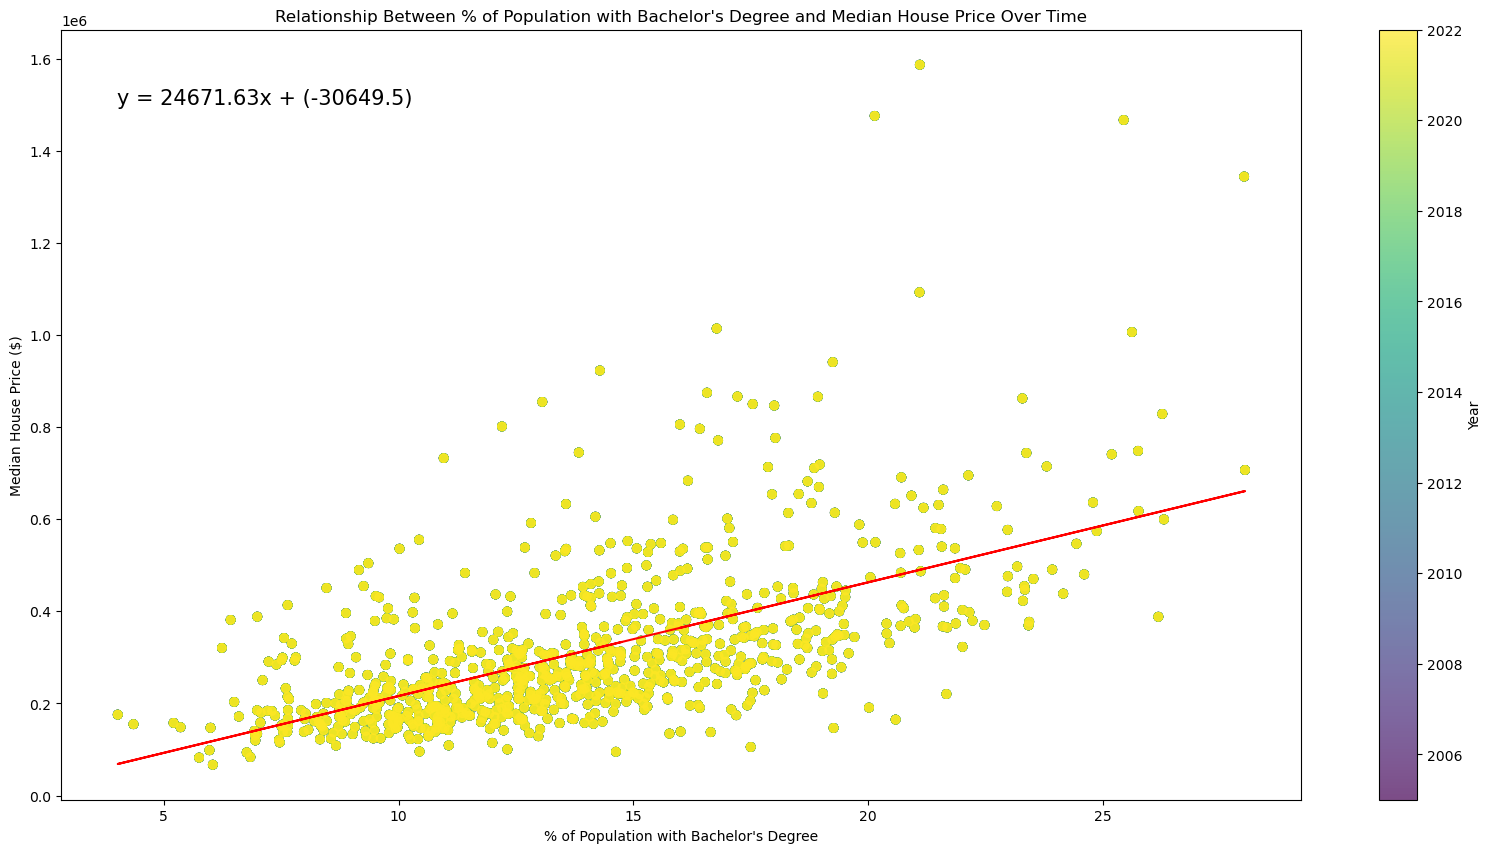

In [ ]:
#LET'S SEE HOW THESE TWO RELATE.
#THIS USES ALL YEARS AND WILL CHANGE ONCE DAT IS FIXED

X = clean_data_df['% Pop. Bachelors Degree']
Y = clean_data_df['Median House Price ($)']

# Scatter plot with color-coded years
plt.figure(figsize=(20, 10))

# Use a color map to differentiate years
scatter = plt.scatter(X, 
                      Y,
                      c=clean_data_df['Year'], cmap='viridis', alpha=0.7)

# Add a color bar to show the year mapping
plt.colorbar(scatter, label='Year')

# Labels and title
plt.title('Relationship Between % of Population with Bachelor\'s Degree and Median House Price Over Time')
plt.xlabel('% of Population with Bachelor\'s Degree')
plt.ylabel('Median House Price ($)')

#TAKING A FIRST LOOK, THERE SEEMS TO BE A POSITIVE RELATIONSHIP. I WILL RUN A REGRESSION, AND THEN CONTROL FOR THE OUTLIERS TO SEE IF THE RELATIONSHIP PERSISTS, IF THERE IS ONE. 

(slope, intercept, rvalue, pvalue, stderr) = linregress(X, Y)
regress_values = X * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + (" +str(round(intercept,2))+ ")"
plt.plot(X,regress_values,"r-")
plt.annotate(line_eq, (4, 1500000),size=15)

print('---------------- Results -----------------------------------------------')
print(f'The slope of {slope:.2f} suggests that, on average, for every 1% increase in the population with a bachelor\'s degree, the median house price increases by ${slope:.2f}')
print(f'The correlation between these variables is {rvalue} and the R-squared is {(rvalue**2)}')
print(f'The negative intercept of {round(intercept, 2)} suggests that this analysis is not quite valid for small house prices and in counties with near-zero bachelor degree holders')
print(f'THIS WILL CHANGE - The p-value of the correlation coefficient is {pvalue:.3f}')
print(f'THIS WILL CHANGE - We conclude that the relationship between bot variables is medium in strengh, and that at least at third of the variability in prices can be captured by educational attainment')
print('------------------------------------------------------------------------')

QUESTION 2 - ARE MEDIAN HOUSE PRICES HIGHER IN COUNTIES WITH A HIGHER PROPORTION OF BACHELOR'S DEGREE HOLDERS?

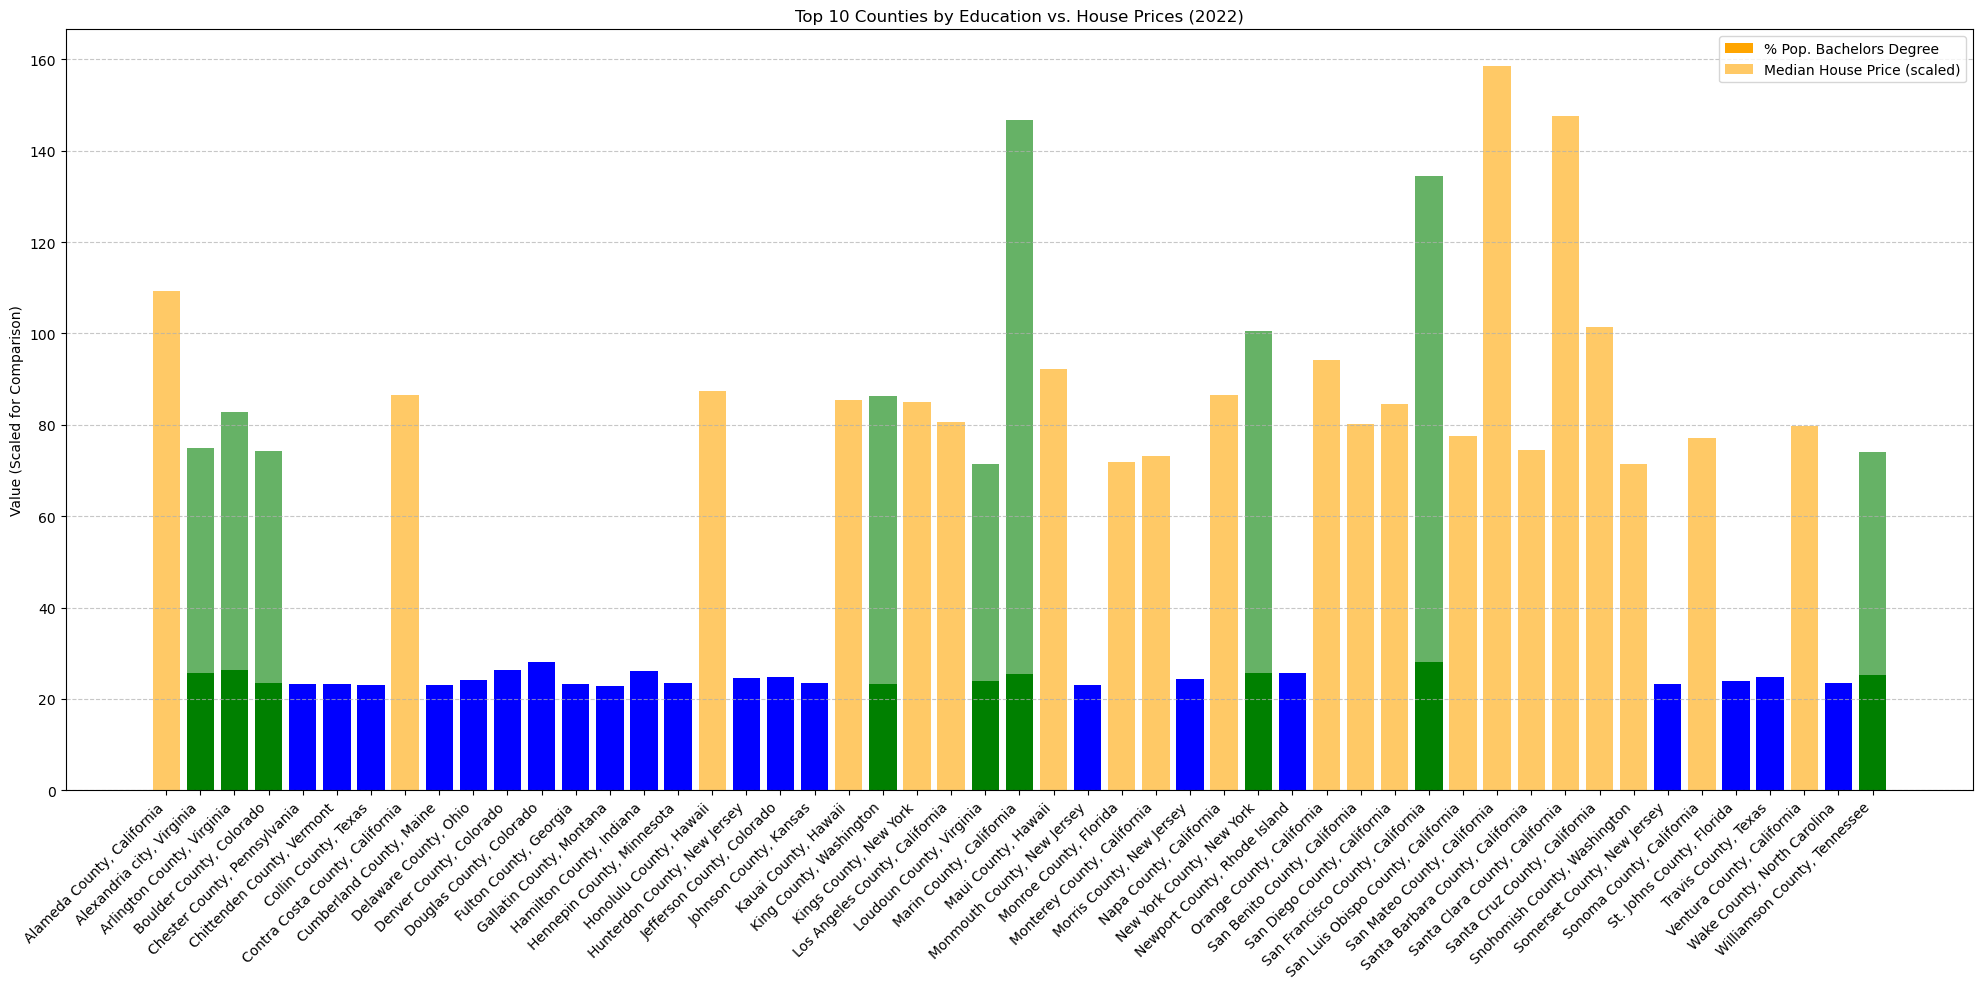

In [81]:
#LET'S ANALYZE ONE YEAR FIRST
# Filter for a single year (e.g., 2022)
selected_year_data = clean_data_df[clean_data_df['Year'] == 2022]

# Top 10 counties by educational attainment
top_edu = selected_year_data.nlargest(30, '% Pop. Bachelors Degree')[['County Name', '% Pop. Bachelors Degree']].copy()
top_edu['List'] = 'Top Edu'

# Top 10 counties by median house price
top_price = selected_year_data.nlargest(30, 'Median House Price ($)')[['County Name', 'Median House Price ($)']].copy()
top_price['List'] = 'Top Price'

# Merge the two lists to find overlaps
merged_top = pd.merge(top_edu, top_price, on='County Name', how='outer', indicator=True)

# Visualize overlap
plt.figure(figsize=(20, 10))
colors = merged_top['_merge'].map({'both': 'green', 'left_only': 'blue', 'right_only': 'orange'})
plt.bar(merged_top['County Name'], merged_top['% Pop. Bachelors Degree'], color=colors, label='% Pop. Bachelors Degree')
plt.bar(merged_top['County Name'], merged_top['Median House Price ($)'] / 10000, color=colors, alpha=0.6, label='Median House Price (scaled)')

# Customize
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value (Scaled for Comparison)')
plt.title('Top 10 Counties by Education vs. House Prices (2022)')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

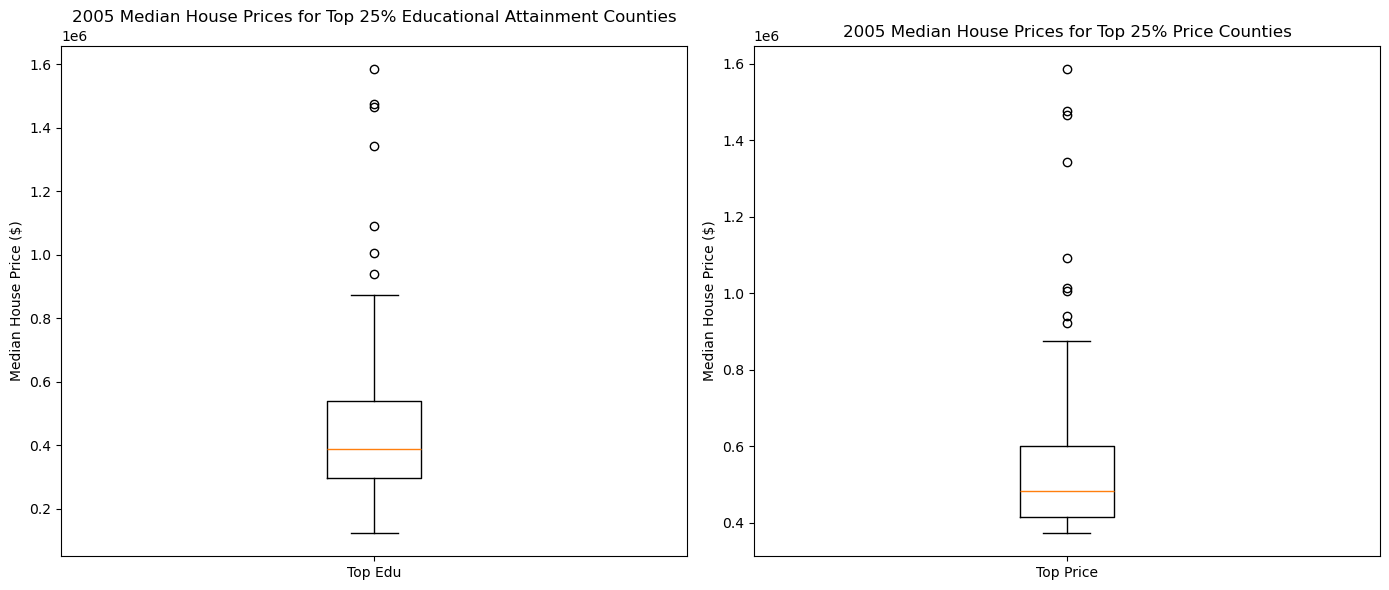

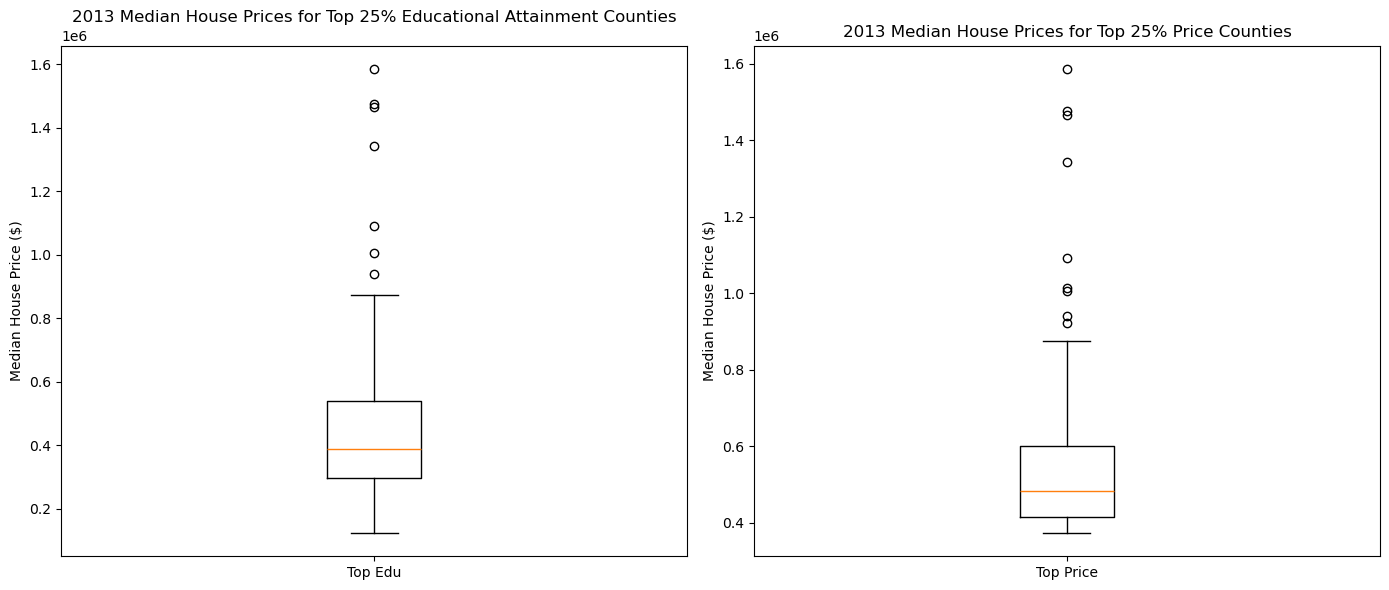

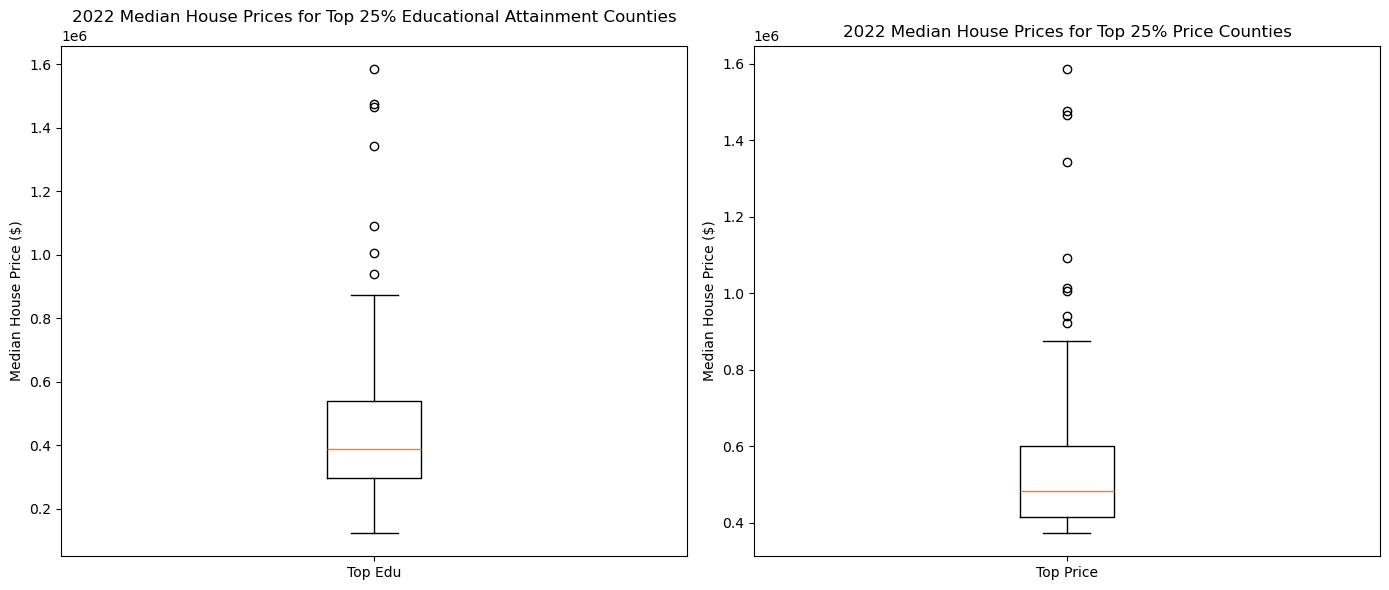

In [ ]:
# LETS SEE HOW THE MEDIAN HOME PRICES HAVE CHANGED OVER TIME FOR BOTH THE TOP 25% HIGHEST-PRICED MARKETS AND TOP 25% EDUCATIONAL ATTAINMENT MARKETS
#THIS USES MULTI YEARS AND WILL CHANGE ONCE DAT IS FIXED

# Filter the top 25% counties based on educational attainment (Bachelors degree)
top_edu2 = first_year_data.nlargest(int(len(first_year_data) * 0.25), 'Population with Bachelor\'s Degree')

# Filter the top 25% counties based on median house prices
top_price2 = first_year_data.nlargest(int(len(first_year_data) * 0.25), 'Median House Price ($)')

# Create the boxplots

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Top Edu
axes[0].boxplot(top_edu2['Median House Price ($)'])
axes[0].set_title('2005 Median House Prices for Top 25% Educational Attainment Counties')
axes[0].set_ylabel('Median House Price ($)')
axes[0].set_xticklabels(['Top Edu'])  # Label for x-axis

# Boxplot for Top Price
axes[1].boxplot(top_price2['Median House Price ($)'])
axes[1].set_title('2005 Median House Prices for Top 25% Price Counties')
axes[1].set_ylabel('Median House Price ($)')
axes[1].set_xticklabels(['Top Price'])  # Label for x-axis

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

#BOX PLOTS FOR MID YEAR
top_edu2 = mid_year_data.nlargest(int(len(mid_year_data) * 0.25), 'Population with Bachelor\'s Degree')
top_price2 = mid_year_data.nlargest(int(len(mid_year_data) * 0.25), 'Median House Price ($)')

# Create the boxplots

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Top Edu
axes[0].boxplot(top_edu2['Median House Price ($)'])
axes[0].set_title('2013 Median House Prices for Top 25% Educational Attainment Counties')
axes[0].set_ylabel('Median House Price ($)')
axes[0].set_xticklabels(['Top Edu'])  # Label for x-axis

# Boxplot for Top Price
axes[1].boxplot(top_price2['Median House Price ($)'])
axes[1].set_title('2013 Median House Prices for Top 25% Price Counties')
axes[1].set_ylabel('Median House Price ($)')
axes[1].set_xticklabels(['Top Price'])  # Label for x-axis

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


#BOXPLOTS FOR LAST YEAR
top_edu2 = last_year_data.nlargest(int(len(last_year_data) * 0.25), 'Population with Bachelor\'s Degree')
top_price2 = last_year_data.nlargest(int(len(last_year_data) * 0.25), 'Median House Price ($)')

# Create the boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Top Edu
axes[0].boxplot(top_edu2['Median House Price ($)'])
axes[0].set_title('2022 Median House Prices for Top 25% Educational Attainment Counties')
axes[0].set_ylabel('Median House Price ($)')
axes[0].set_xticklabels(['Top Edu'])  # Label for x-axis

# Boxplot for Top Price
axes[1].boxplot(top_price2['Median House Price ($)'])
axes[1].set_title('2022 Median House Prices for Top 25% Price Counties')
axes[1].set_ylabel('Median House Price ($)')
axes[1].set_xticklabels(['Top Price'])  # Label for x-axis

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

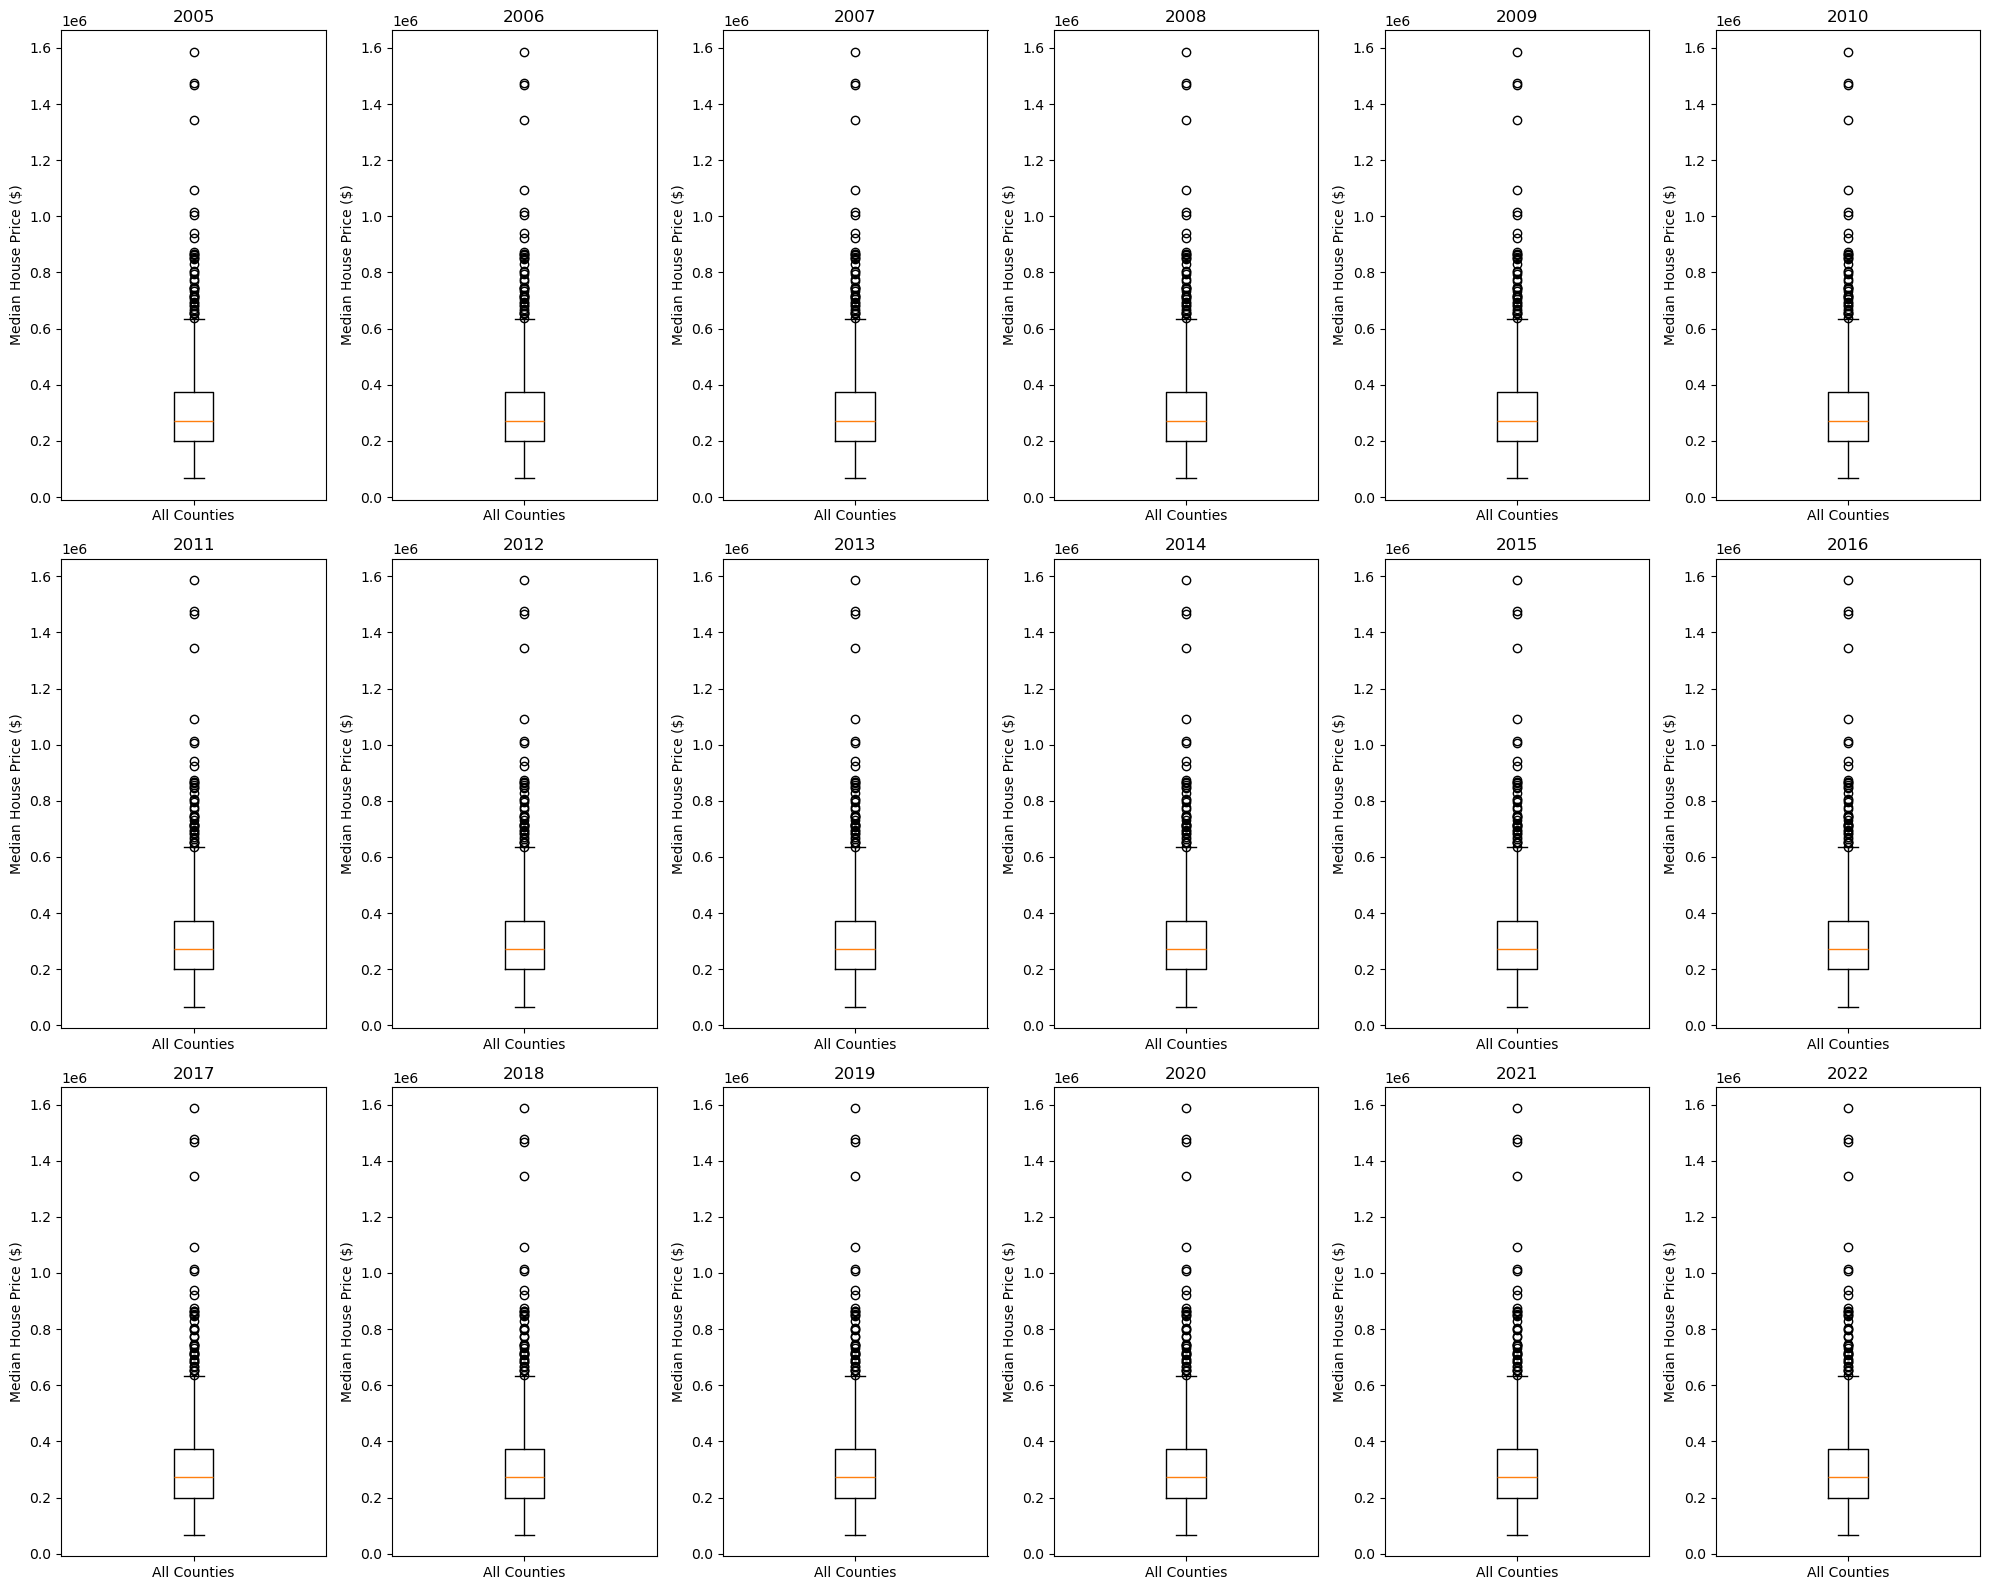

In [87]:
#THIS IS THE SAME ANALYSIS AS ABOVE BUT FOR EACH YEAR, AND WILL CHANGE ONCE WEFIX OUR DATA ISSUE

years = range(2005, 2023)

# Set up a figure with subplots (one for each year)
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 16))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each year and create a box plot for that year
for i, year in enumerate(years):
    # Filter data for the specific year using the 'Year' column
    year_data = clean_data_df[clean_data_df['Year'] == year]
    
    # Create the boxplot for 'Median House Price ($)' for this year
    axes[i].boxplot(year_data['Median House Price ($)'])
    
    # Set the title and labels for the subplot
    axes[i].set_title(f'{year}')
    axes[i].set_ylabel('Median House Price ($)')
    axes[i].set_xticklabels(['All Counties'])
    
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

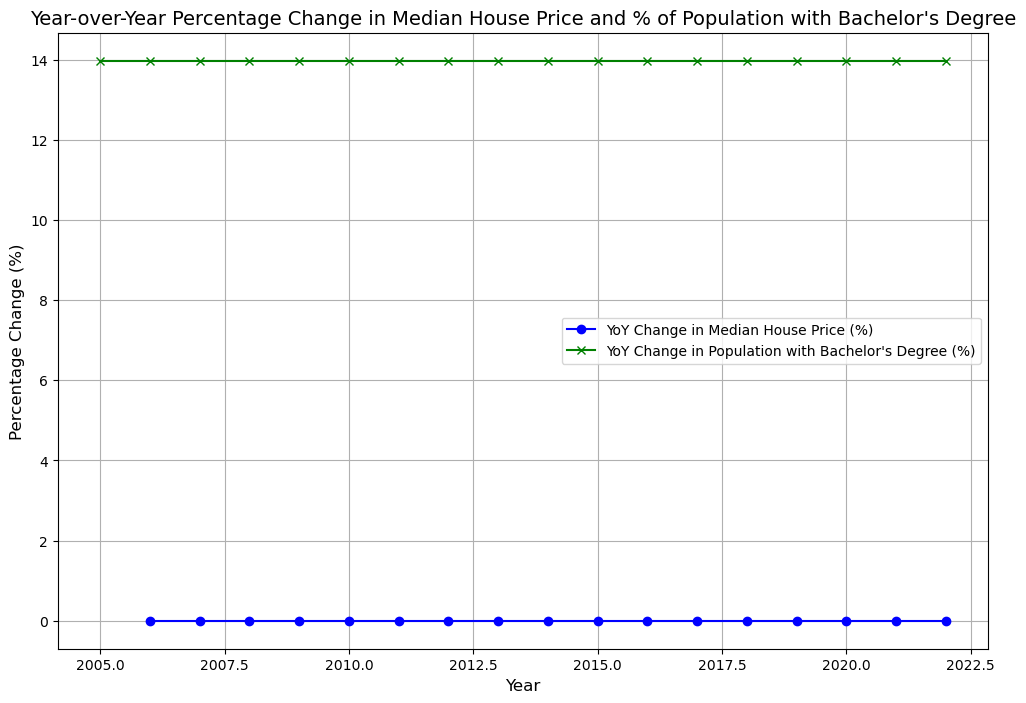

In [ ]:
#LET'S SEE HOW PRICES AND EDUCATION HAVE CHANGED OVER TIME
#THIS USES ALL YEARS AND WILL CHANGE ONCE DAT IS FIXED

# Step 1: Calculate the YoY percentage change for Median House Price
average_house_price_per_year = clean_data_df.groupby('Year')['Median House Price ($)'].mean()
house_price_pct_change = average_house_price_per_year.pct_change().dropna() * 100  # Percentage change

edu_pct_change = clean_data_df.groupby('Year')['% Pop. Bachelors Degree'].mean()


# Step 3: Plotting both lines on the same graph
plt.figure(figsize=(12, 8))

# Plot Median House Price YoY Percentage Change
plt.plot(house_price_pct_change.index, house_price_pct_change, label='YoY Change in Median House Price (%)', color='b', marker='o')

# Plot Population with Bachelor's Degree YoY Percentage Change
plt.plot(edu_pct_change.index, edu_pct_change, label="YoY Change in Population with Bachelor's Degree (%)", color='g', marker='x')

# Add labels and title
plt.title('Year-over-Year Percentage Change in Median House Price and % of Population with Bachelor\'s Degree', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)

# Add a legend to distinguish between the two lines
plt.legend()

# Display gridlines for clarity
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
#PERFORM A T-TEST ON THE DIFFERENCE BETWEEN MEAN HOUSE PRICES FOR TOP AND BOTTOM COUNTIES
#THIS USES ALL YEARS AND WILL CHANGE ONCE DAT IS FIXED
#note the median makes more sense for house prices given right skew
#any way to plot/visualize this?

# Step 1: Group by 'County Name' and 'Combined FIPS', and calculate average values for educational attainment and median house price
grouped_df = clean_data_df.groupby(['County Name', 'Combined FIPS']).agg(
    avg_bachelor_degree=('% Pop. Bachelors Degree', 'mean'),
    avg_median_house_price=('Median House Price ($)', 'median')
).reset_index()

# Step 2: Sort by educational attainment and select top 20% and bottom 20% counties
top_edu_counties = grouped_df.nlargest(int(len(grouped_df) * 0.20), 'avg_bachelor_degree')
bottom_edu_counties = grouped_df.nsmallest(int(len(grouped_df) * 0.20), 'avg_bachelor_degree')

# Step 3: T-test on the Median House Price for top and bottom educational attainment counties
# Extract the median house prices for each group
top_edu_prices = top_edu_counties['avg_median_house_price']
bottom_edu_prices = bottom_edu_counties['avg_median_house_price']

# Perform t-test
t_stat, p_value = stats.ttest_ind(top_edu_prices, bottom_edu_prices)

# Output the result
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if the p-value is less than 0.05 to conclude if there's a significant difference
if p_value < 0.05:
    print("There is a significant difference in median house prices between top and bottom educational attainment counties.")
else:
    print("There is no significant difference in median house prices between top and bottom educational attainment counties.")

T-statistic: 14.083855610561889
P-value: 1.1015620674705853e-35
There is a significant difference in median house prices between top and bottom educational attainment counties.


C:\Users\jitra\AppData\Local\Temp\ipykernel_16152\618907048.py:20: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat, p_value = stats.ttest_ind(top_edu_prices, bottom_edu_prices)


STEP 7 - Insights & Reporting
Summarize findings, focusing on:
Strength and direction of correlation.
Patterns over time and across counties.
Results of hypothesis tests.
Highlight key takeaways:
Are counties with higher educational attainment significantly correlated with higher house prices?
Are there outliers or regions where the relationship deviates?
Discuss limitations (e.g., potential confounding variables or data coverage).